<a href="https://colab.research.google.com/github/LuisRodarteSolorzano/Curso-MUFRAMEX/blob/main/Copia_de_Ejemplo_bostonhousing_REGRESION_Seleccion_Variables_Training_ue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El conjunto de datos de Boston Housing es un conjunto de datos clásico en el campo del aprendizaje automático y la estadística. Fue creado por el U.S Census Service en la década de 1970 y es ampliamente utilizado para tareas de regresión. El conjunto de datos contiene información recopilada de los suburbios de Boston, Massachusetts.

Aquí hay un resumen de las variables (características) que incluye:

1. **CRIM**: Tasa de criminalidad per cápita por ciudad.

2. **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.

3. **INDUS**: Proporción de acres comerciales no minoristas por ciudad.

4. **CHAS**: Variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario).

5. **NOX**: Concentración de óxidos nítricos (partes por 10 millones).

6. **RM**: Número promedio de habitaciones por vivienda.

7. **AGE**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

8. **DIS**: Distancias ponderadas a cinco centros de empleo de Boston.

9. **RAD**: Índice de accesibilidad a carreteras radiales.

10. **TAX**: Tasa de impuesto a la propiedad de valor total por $10,000.

11. **PTRATIO**: Proporción alumno-profesor por ciudad.

12. **B**: 1000(Bk - 0.63)^2, donde Bk es la proporción de personas de ascendencia afroamericana por ciudad.

13. **LSTAT**: Porcentaje de la población de estatus inferior.

14. **MEDV**: Valor medio de las viviendas ocupadas por sus propietarios en $1000. Esta es generalmente la variable objetivo en las tareas que utilizan este conjunto de datos.

Este conjunto de datos es útil para entender y practicar con técnicas de regresión en aprendizaje automático. Se utiliza a menudo para predecir el valor medio de las viviendas (MEDV) en base a las otras características. Sin embargo, es importante mencionar que, debido a la sensibilidad y posibles problemas éticos asociados con algunas de sus variables (como la característica "B"), el uso de este conjunto de datos ha sido objeto de debate en los últimos años. Además, es un conjunto de datos relativamente antiguo y puede no reflejar las condiciones actuales de vivienda o sociales.

In [1]:
import matplotlib.pyplot as plt # crear graficos
plt.rcParams["figure.figsize"] = (10,5) # cambiar el tamano de las figuras
import seaborn as sns # graficos con dataframes

import numpy as np # manipulacion de vectores
import pandas as pd # manipulacion de dataframes igual R

import missingno as msno # manipular y visualizar los valores perdidos Nans

from sklearn.feature_selection import mutual_info_classif # calculo de la mutual information o MI

from sklearn.feature_selection import f_classif # calculo de test estadisticos ANOVA
#from sklearn.feature_selection import r_regression # calculo de la correlacion de Pearson
from sklearn.linear_model import LogisticRegression # calculo de una regresion logistica con sklearn
from sklearn.linear_model import LinearRegression # calculo de una regresion lineal multiple sklearn
import statsmodels.api as sm # calculo de regresion logistico mas estadistico tipo R con statsmodels
from sklearn.feature_selection import RFE # algoritmo de quitar variables que no son importantes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de datos

In [3]:
file_gd = '/content/drive/MyDrive/CURSO MUFRAMEX CIMAT/SESION 2 y 3 - MACHINE LEARNING SUPERVISADO/PYTHON PASO A PASO/datos/data_boston.csv'
data = pd.read_csv(file_gd,header=0,delimiter=";")



## Exploración previa

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
# Numero de filas y observacions
print('Número de filas:')
len(data)

Número de filas:


506

In [ ]:
print('Número de columnas:')
len(data.columns)

Número de columnas:


14

In [ ]:
# Tipos de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# Tipos de variables: las variables factores o cualitativas son object. Las cuantitativas son int64 o float64
pd.DataFrame(data.dtypes)

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


<Axes: >

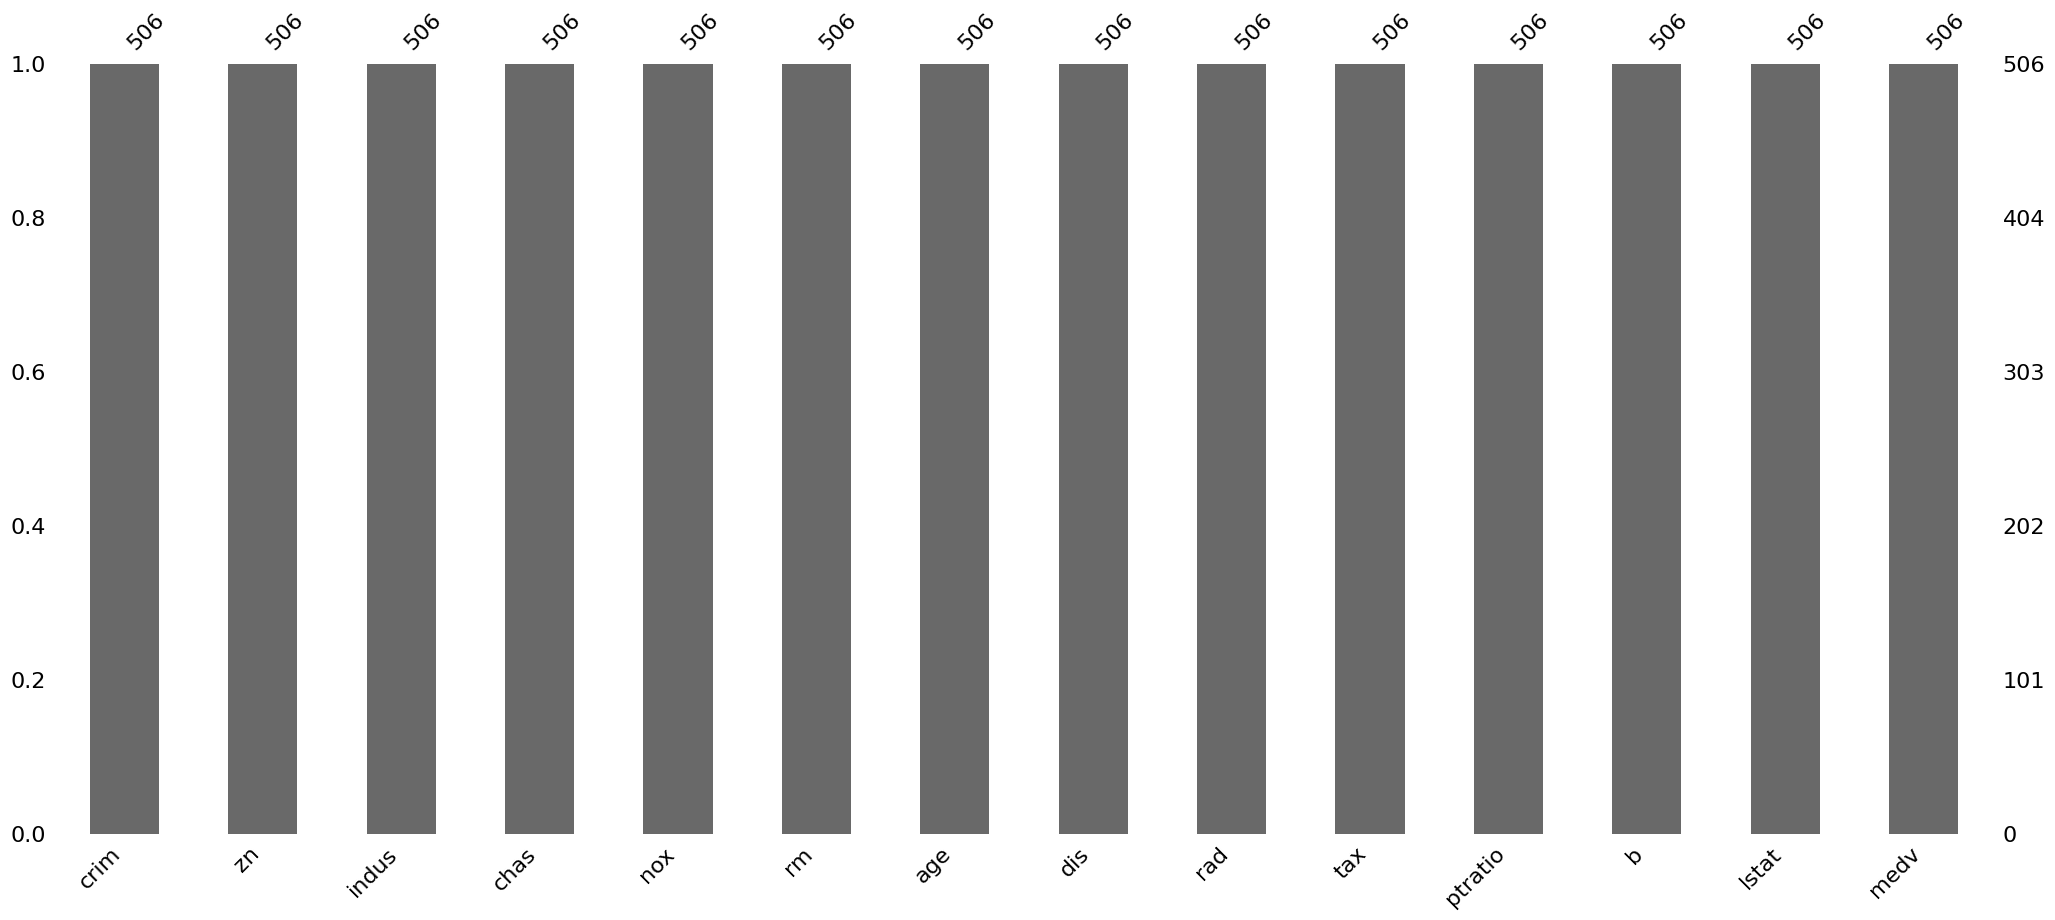

In [ ]:
#import missingno as msno

# Visualize the number of missing
# values as a bar chart
msno.bar(data)

<Axes: >

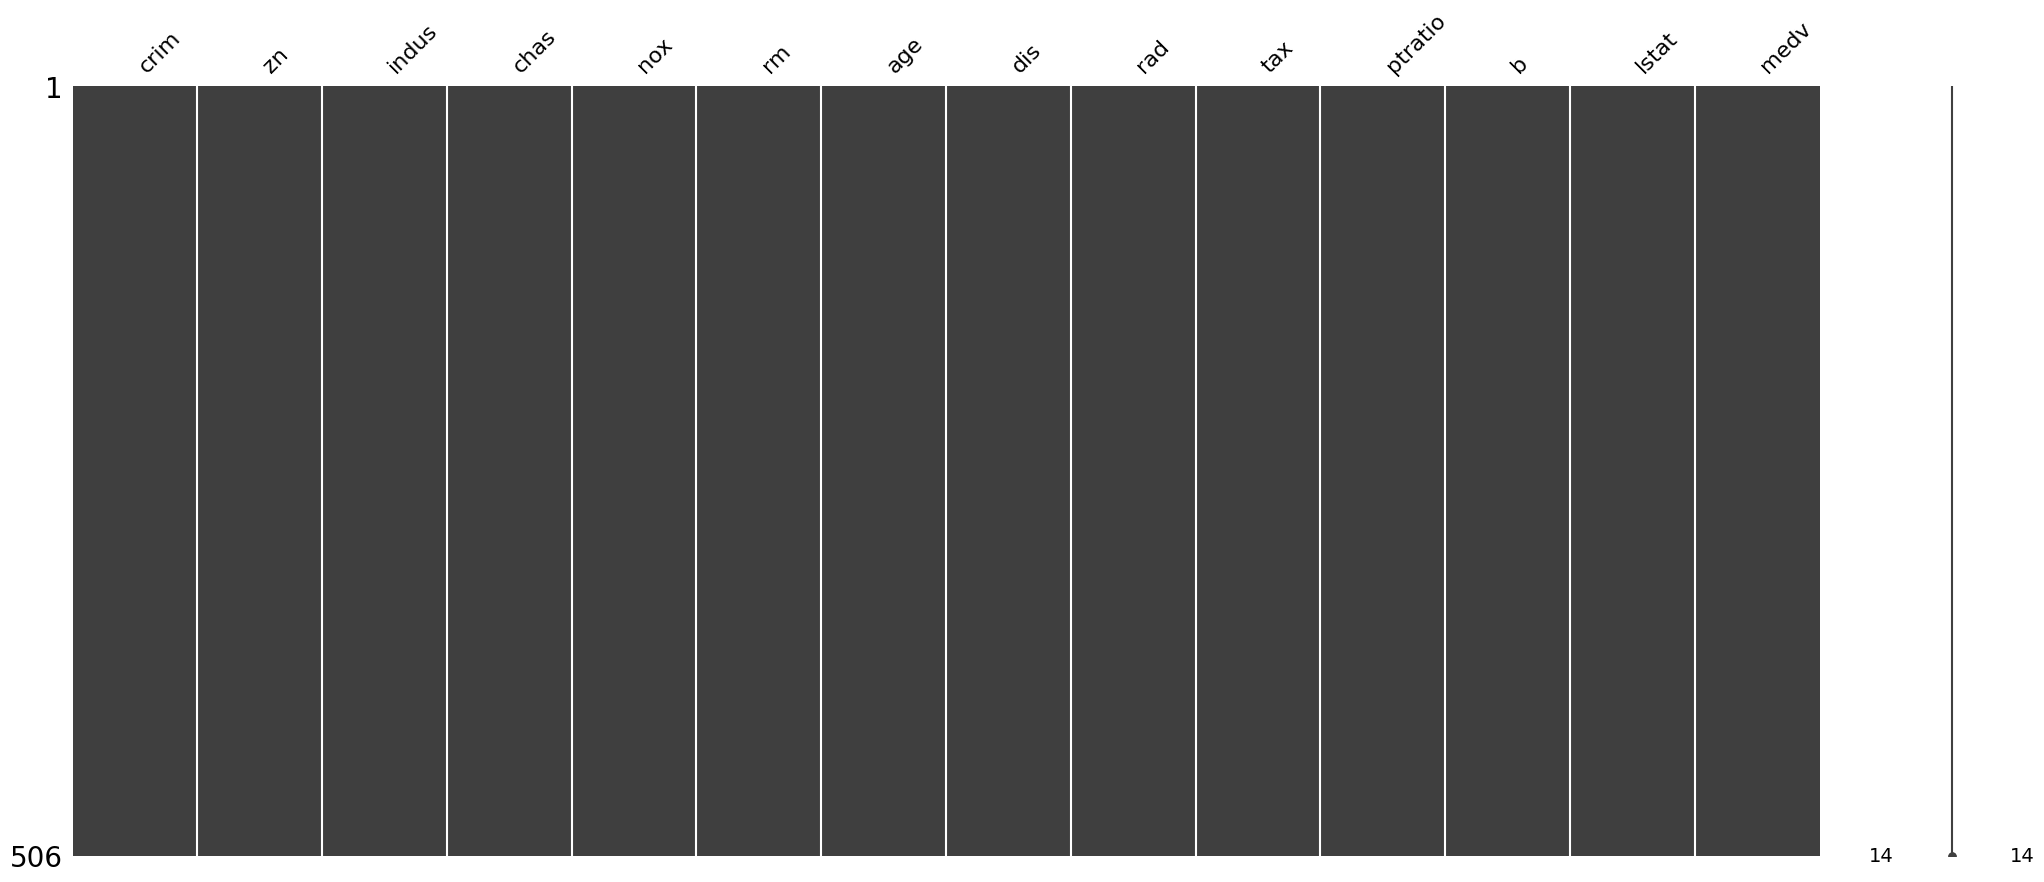

In [ ]:
# Visualize missing values as a matrix
msno.matrix(data)

In [ ]:
# Quitar las filas con nans
# Quitar los NAs
data = data.dropna()
data.head()

## Para variables numericas:
## Podemos imputar los nans con el promedio, mediana:
#df.fillna(df.mean(), inplace=True)


## Para variables categoricas:
#for columna in ['Categoria1', 'Categoria2']:
#    df[columna].fillna(df[columna].mode()[0], inplace=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Transformar tipos de variables

In [ ]:
# Trasnformar las variables cualitativas (tipo object)
data['chas'] = data['chas'].astype(object)


# Mirar los nuevos tipos de variables:
pd.DataFrame(data.dtypes)

,0
crim,float64
zn,float64
indus,float64
chas,object
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


# Limpieza y ordenación de los datos

## Identificar la variable respuesta

In [ ]:
# Identificar variable respuesta
respuesta = np.array(['medv'])
#respuesta = (['output'])
respuesta = respuesta.astype(object)
respuesta

array(['medv'], dtype=object)

## Identificar variables explicativas cualitativas

In [ ]:
# Seleccionar todas las variables menos la respuesta:
data.drop(respuesta[0], axis=1).head(50)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [ ]:
# Identificar variables explicativas cualitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
tipos_variables[0]=='object'

crim       False
zn         False
indus      False
chas        True
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
Name: 0, dtype: bool

In [ ]:
# Identificar las variables cualitativas. Juntamos los dos pasos anteriores:
var_cual = data.drop(respuesta[0], axis=1).columns[tipos_variables[0]=='object']
pd.DataFrame(var_cual)

,0
0,chas


## Identificar variables explicativas numéricas

In [ ]:
# Identificar variables explicativas cuantitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')

crim        True
zn          True
indus       True
chas       False
nox         True
rm          True
age         True
dis         True
rad         True
tax         True
ptratio     True
b           True
lstat       True
Name: 0, dtype: bool

In [ ]:
# Identificar las variables cuantitativas. Juntamos los dos pasos anteriores:
var_num = data.drop(respuesta[0], axis=1).columns[(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')]
pd.DataFrame(var_num)

,0
0,crim
1,zn
2,indus
3,nox
4,rm
5,age
6,dis
7,rad
8,tax
9,ptratio


# Exploración del dataset

## Describir la variable respuesta

<ipython-input-31-f2fe36c0ee6c>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


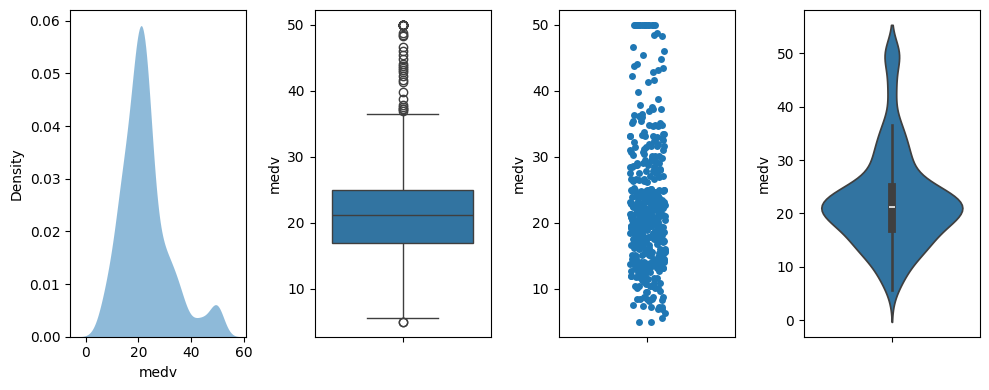

In [ ]:
# Distribuciones de la variable respuesta:
fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
sns.kdeplot(
    data=data, x=respuesta[0],
    fill=True, common_norm=False, palette="crest",
    alpha=.5, linewidth=0, ax=axs[0])
sns.boxplot(data=data, y=respuesta[0],ax=axs[1])
sns.stripplot(y= respuesta[0],data=data,ax=axs[2])
sns.violinplot(data=data, y=respuesta[0],ax=axs[3])
fig.tight_layout()
plt.show()

In [ ]:
# Descripcion:
data[respuesta].describe()

,medv
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


## Descripción de variables cuantitativas de entrada

In [ ]:
# Descripcion numericas / estadisticos descriptivos:
data[var_num].describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


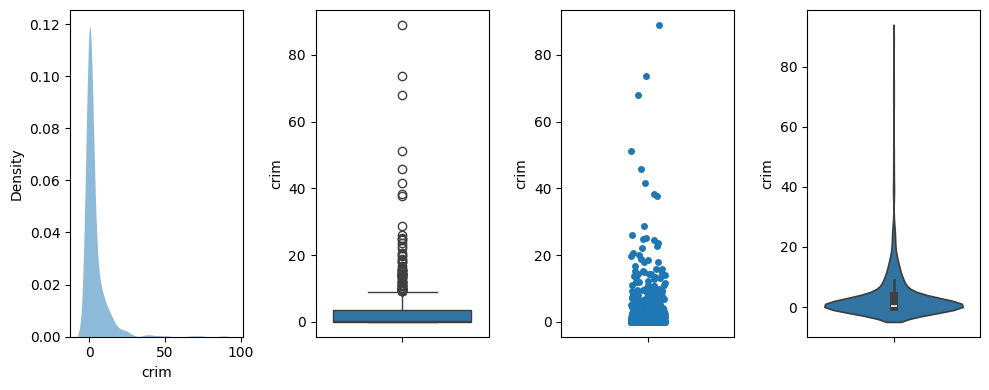

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


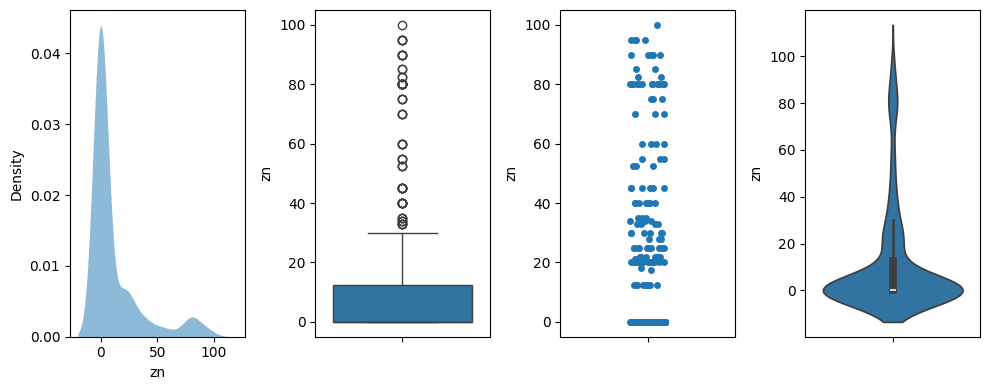

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


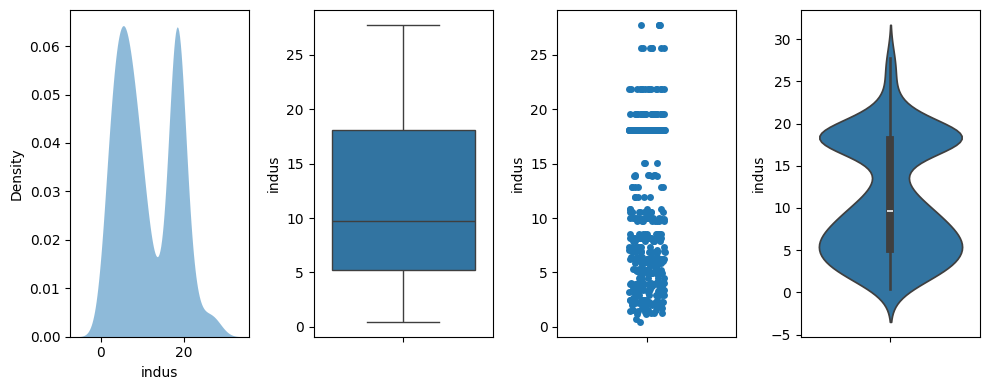

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


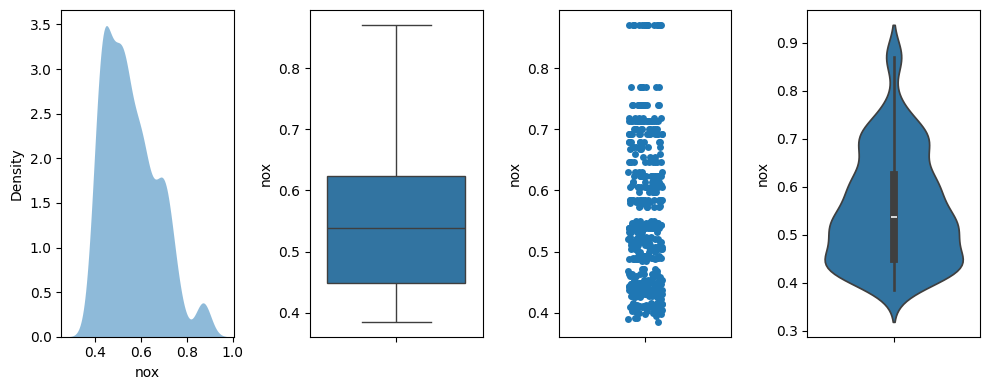

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


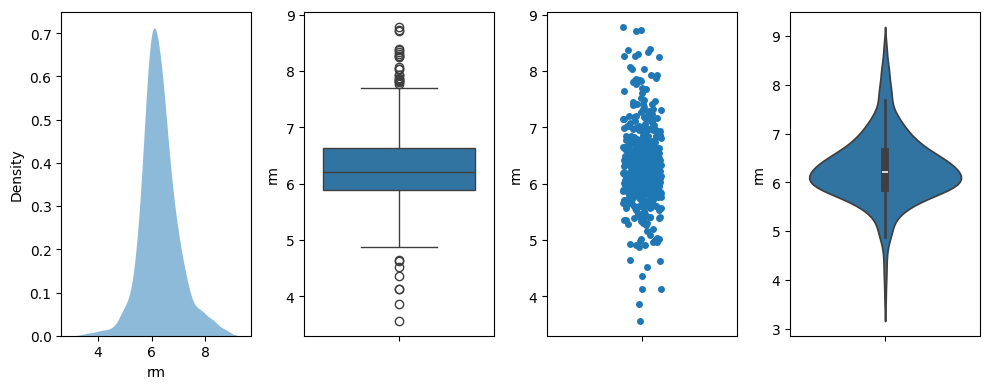

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


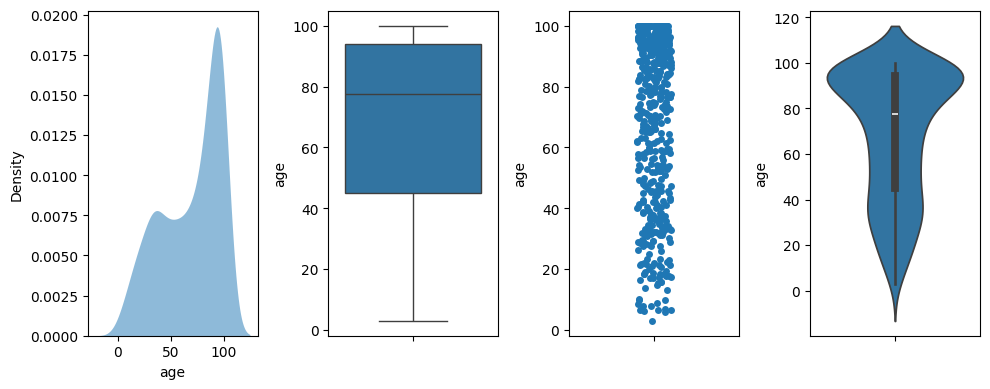

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


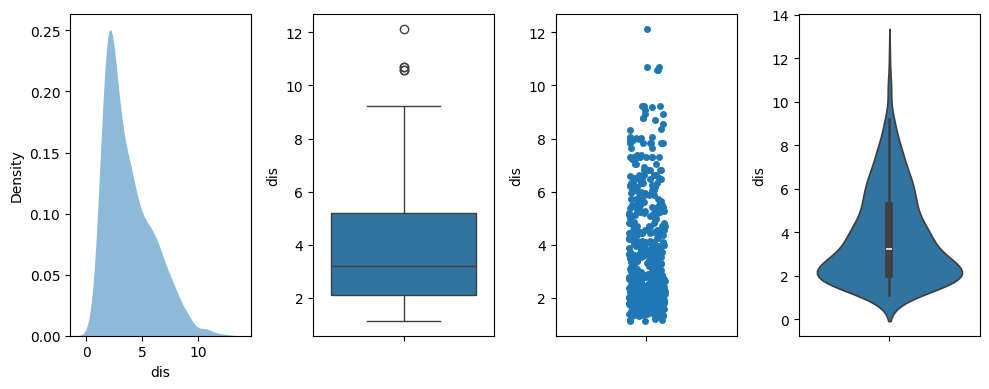

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


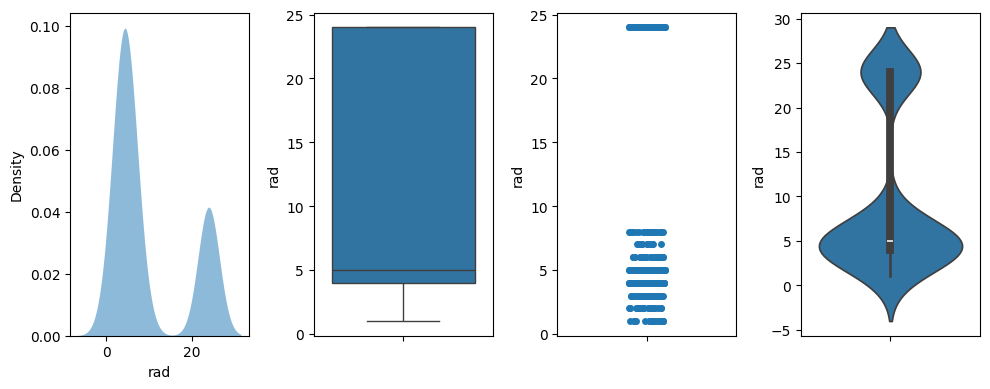

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


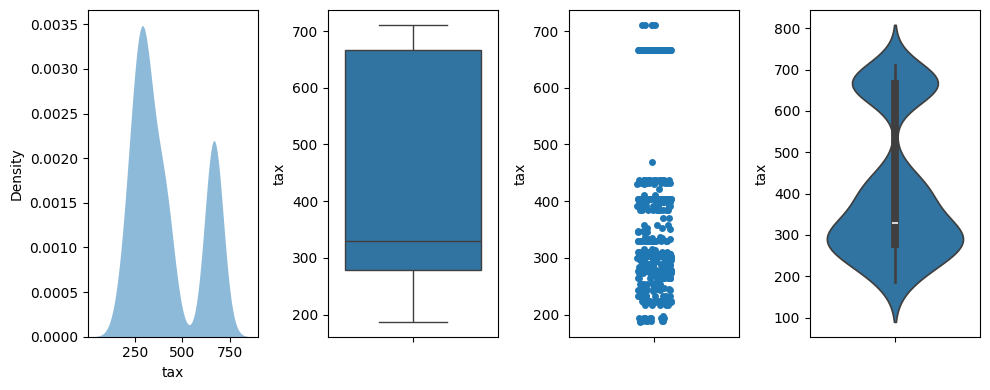

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


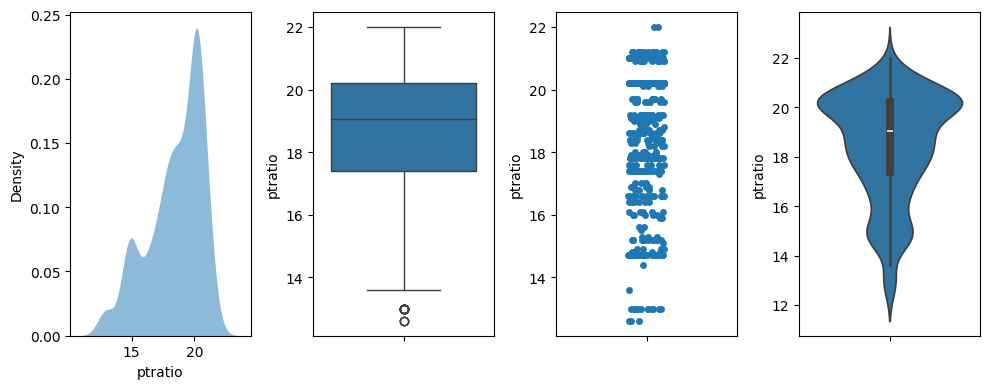

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


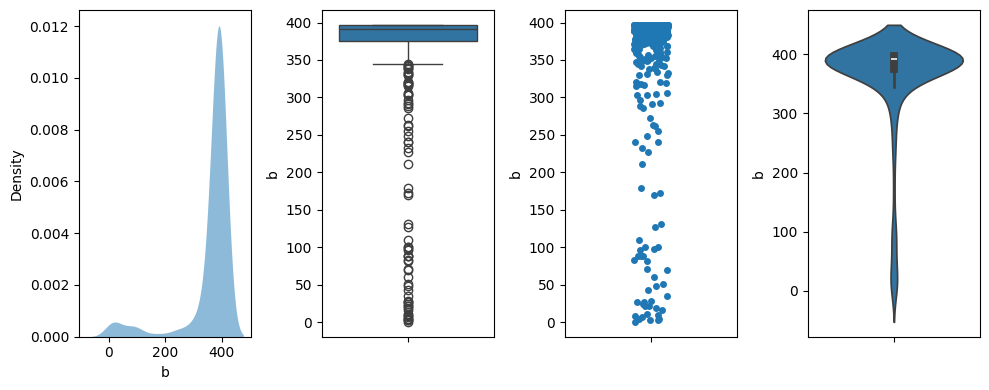

<ipython-input-34-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


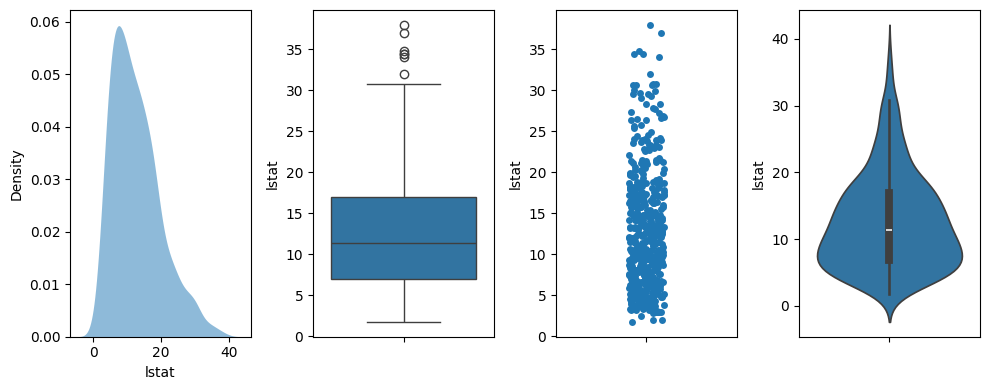

In [ ]:
# Histograma de densidad, boxplot, stripchart y violin plot:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i,ax=axs[1])
    sns.stripplot(y= i,data=data,ax=axs[2])
    sns.violinplot(data=data, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

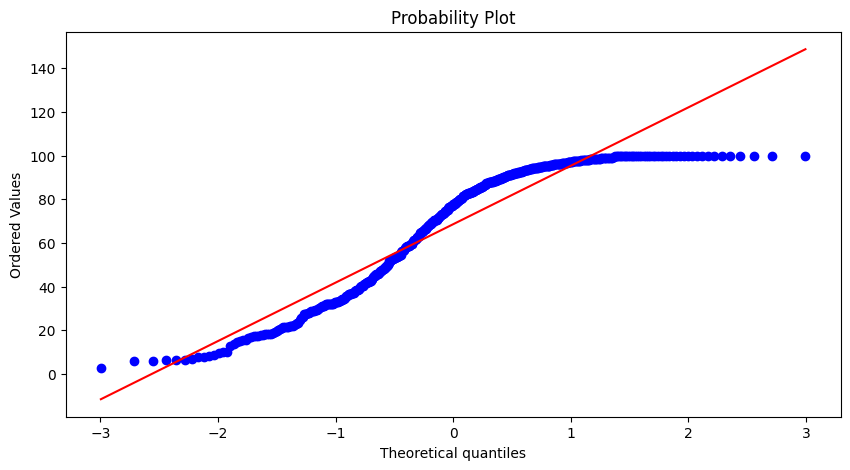

In [ ]:
# Ejemplo de qqplot por si quieres introducirlo en el for:
import scipy.stats as stats
import pylab as py
stats.probplot(data['age'], dist="norm", plot=plt)
py.show()

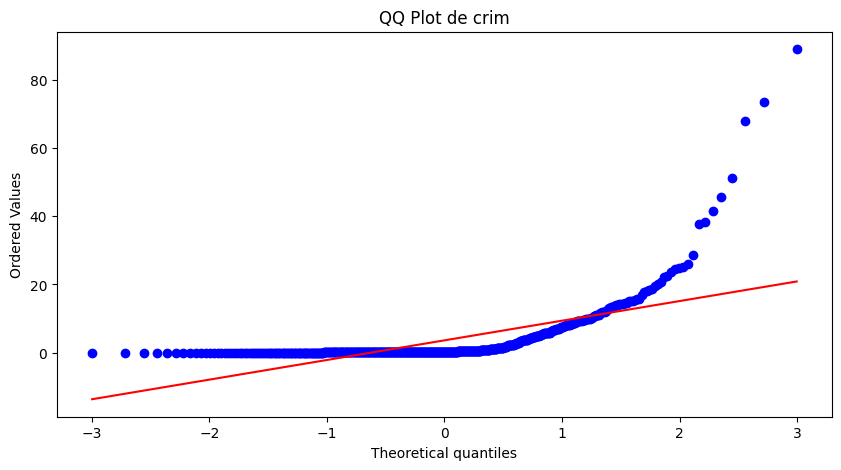

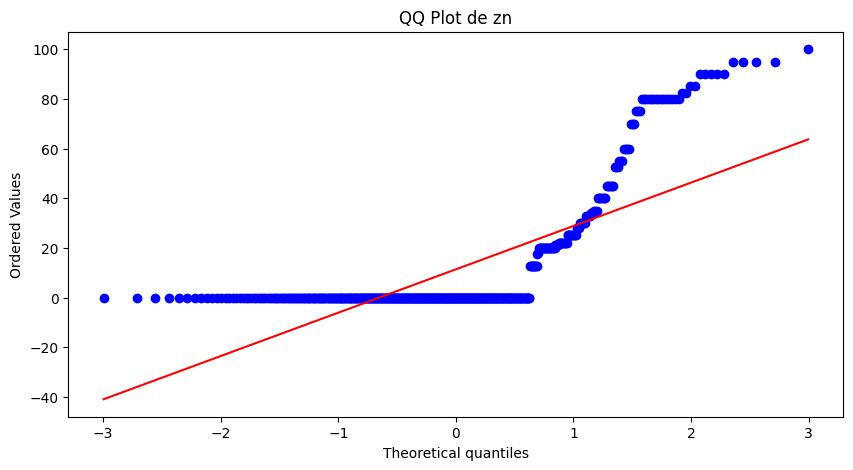

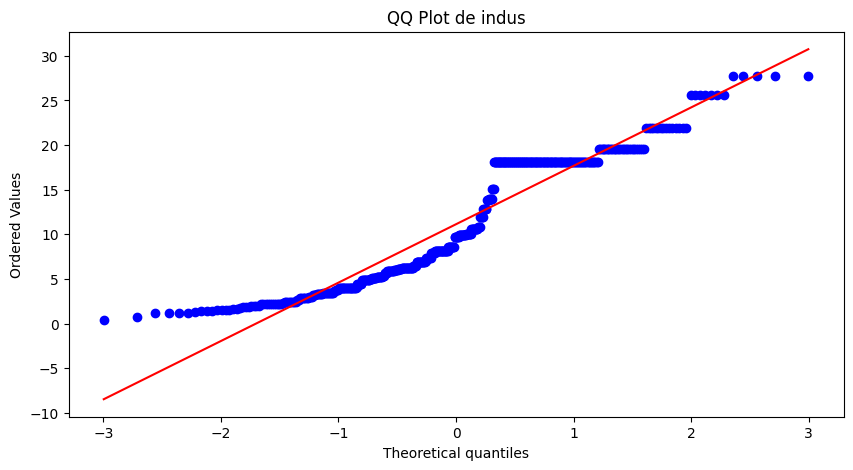

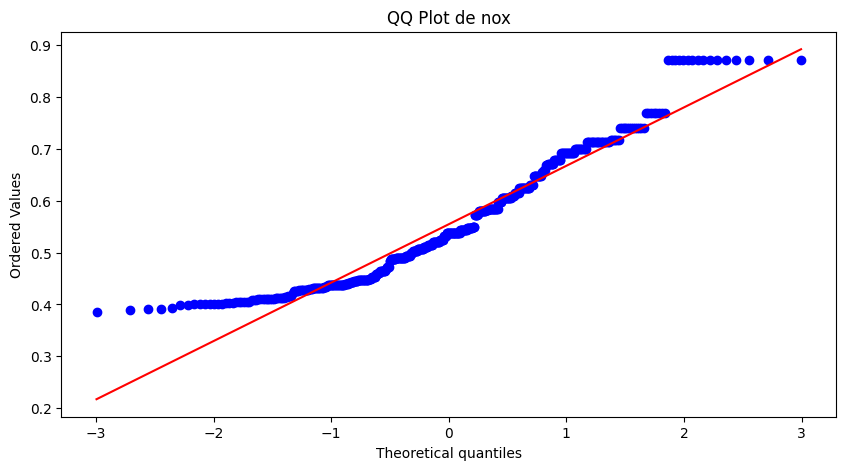

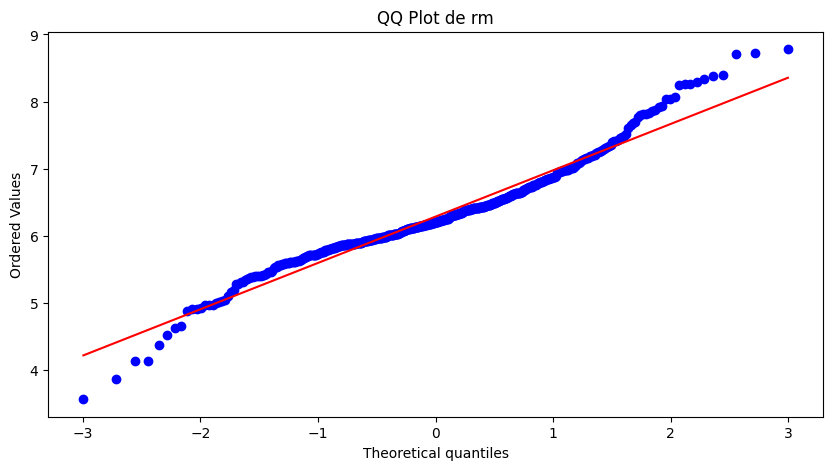

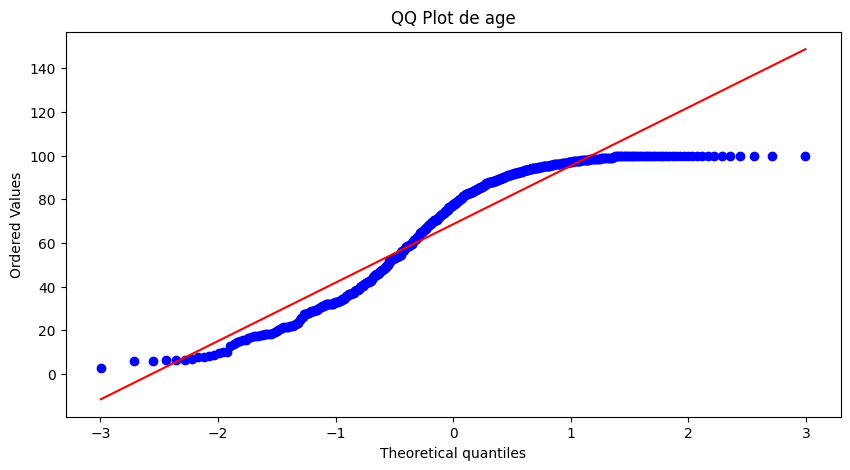

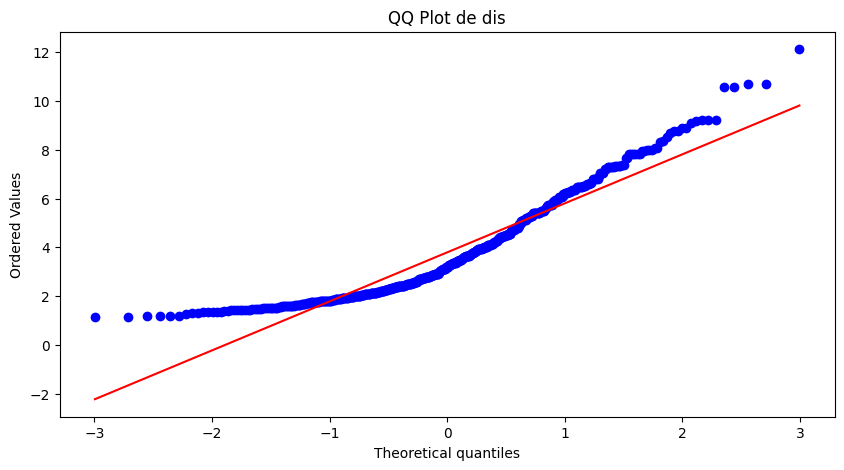

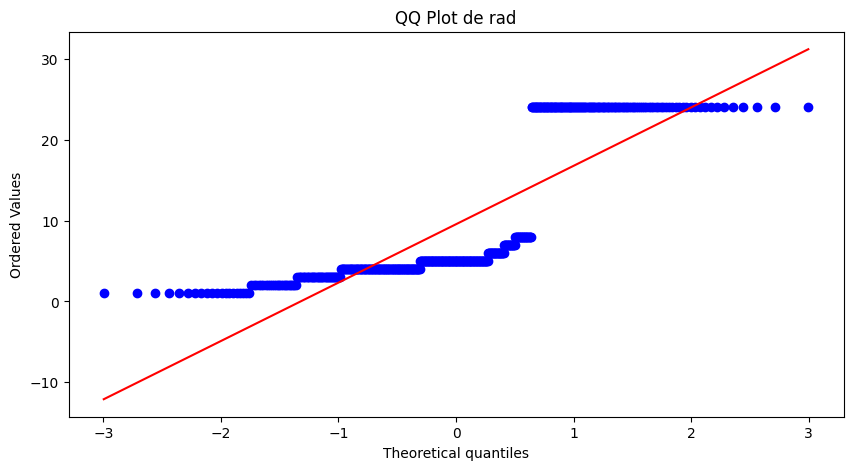

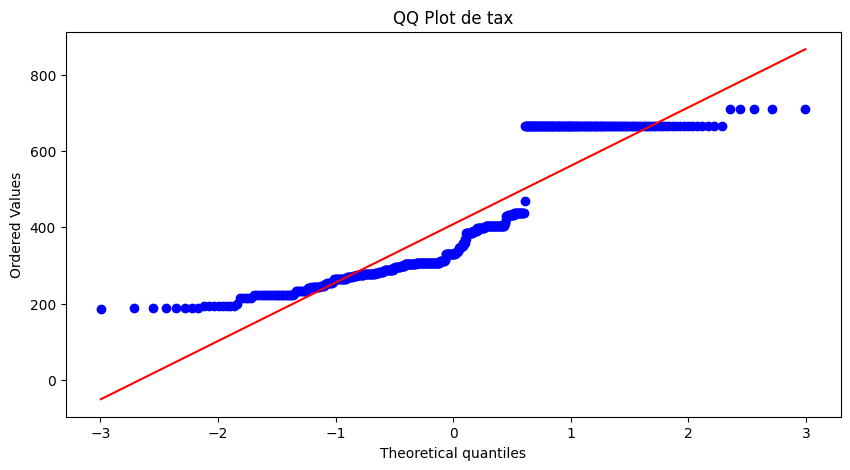

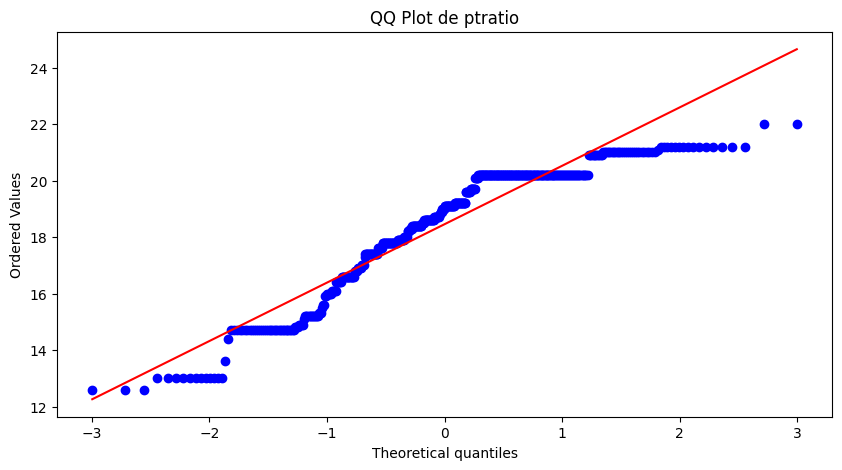

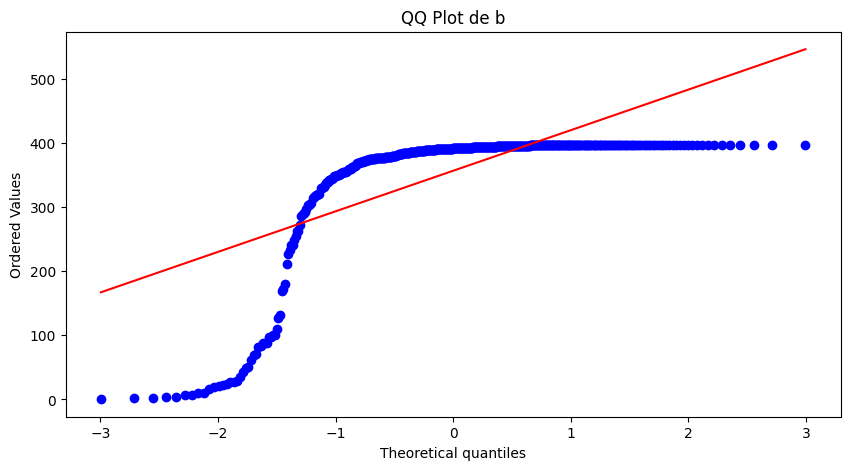

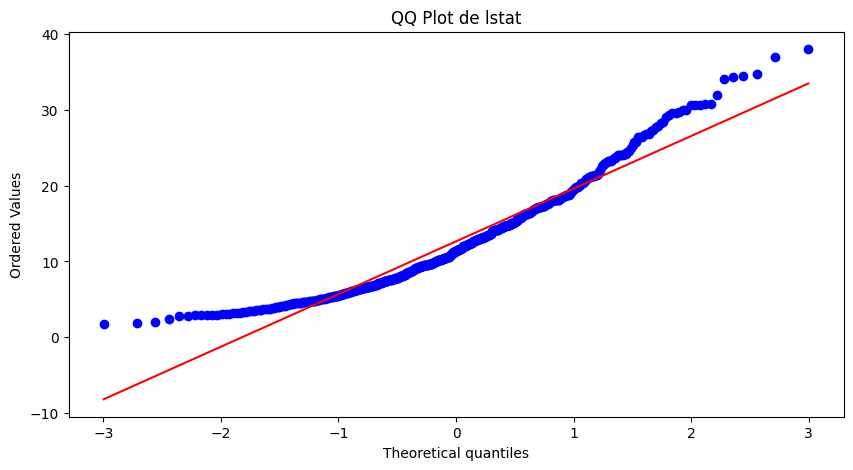

In [ ]:
# Ejemplo de qqplot por si quieres introducirlo en el for:
import scipy.stats as stats
import pylab as py

for i in var_num:
    stats.probplot(data[i], dist="norm", plot=plt)
    plt.title(f'QQ Plot de {i}')  # Añadir un título, 'i' es el nombre de la variable actual
    py.show()

## Descripción variables cualitativas

Tabla de frecuencias absolutas:
0    471
1     35
Name: chas, dtype: int64
Tabla de frecuencias porcentaje:
   chas  percent
0     0  0.93083
1     1  0.06917


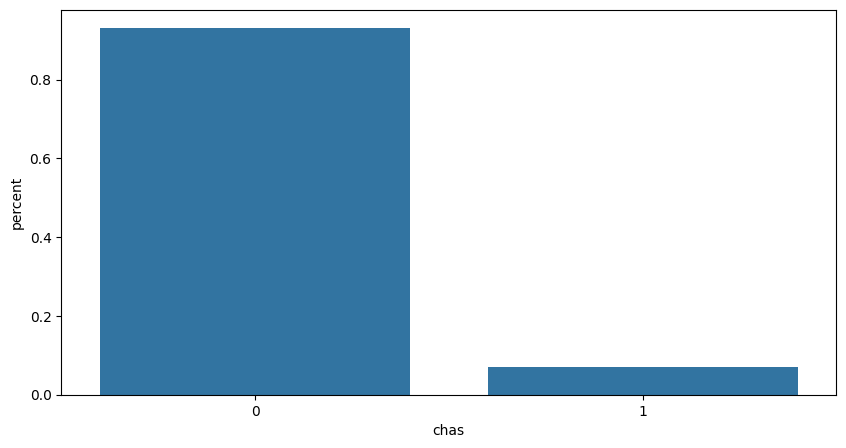

In [ ]:
# Mostrar graficos y tablas de todas las variables cualitativas
for i in var_cual:
    print('Tabla de frecuencias absolutas:')
    print(data[i].value_counts())
    print('Tabla de frecuencias porcentaje:')
    pct = data[i].value_counts(normalize=True).reset_index().rename({'index':i,i:'percent'}, axis=1)
    print(pct)
    sns.barplot(x=i, y='percent', data=pct)
    plt.show()

# Descripción multivariada

## Separamos variables de entrada y salida

In [ ]:
X_tot = data.drop(respuesta[0], axis=1) # variables de entrada TODAS sin la salida

X_cual = data.drop(var_num, axis=1)
X_cual = X_cual.drop(respuesta[0], axis=1) # variables cualitativas sin la salida

X_num = data.drop(var_cual, axis=1)
X_num = X_num.drop(respuesta[0], axis=1) # variables cuantitativas sin la salida
X_num_tot = data.drop(var_cual, axis=1) # variables cuantitativas con la salida


y = data[respuesta[0]] # variable de salida

## Variables cuantitativas vs la salida:

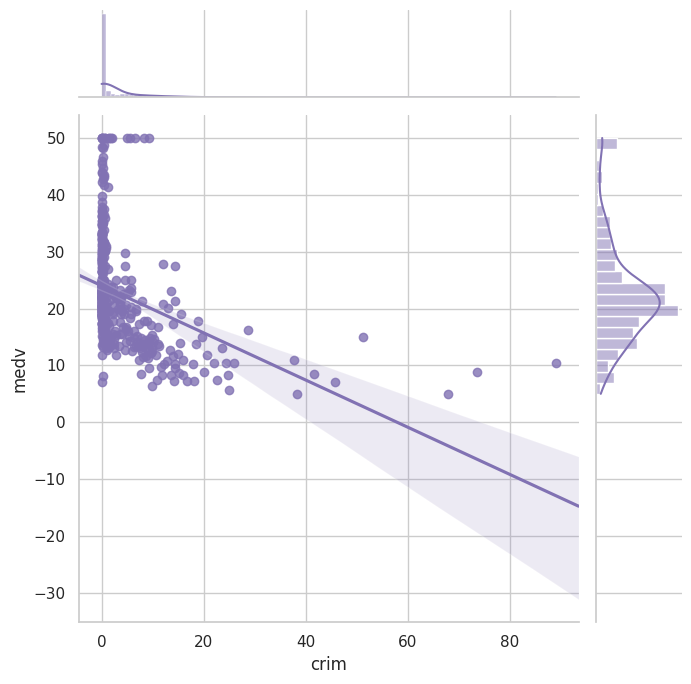

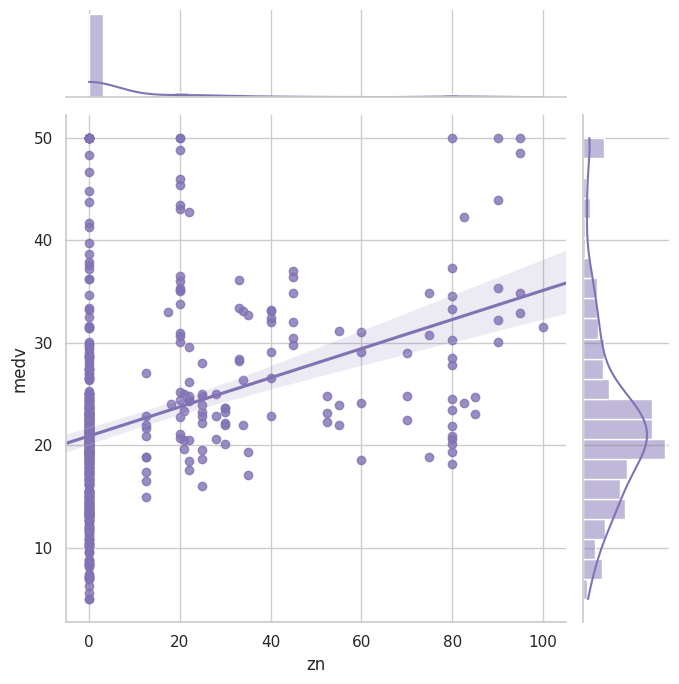

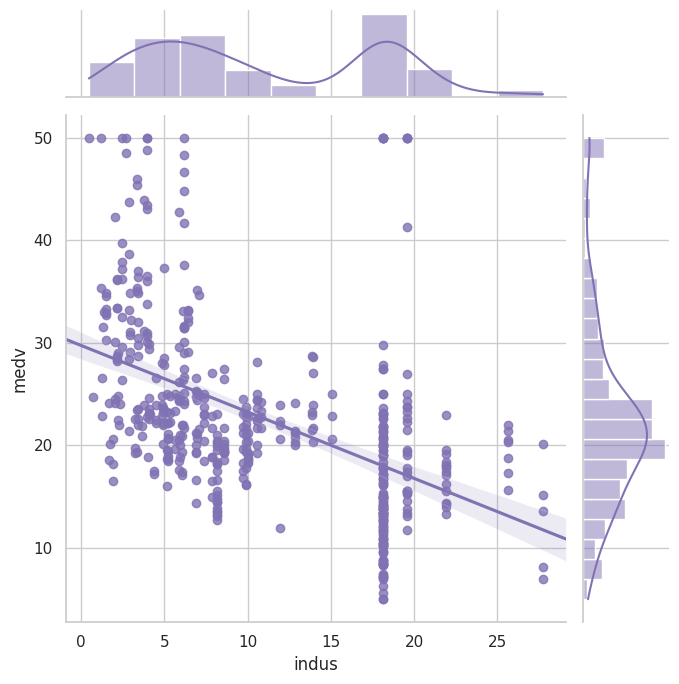

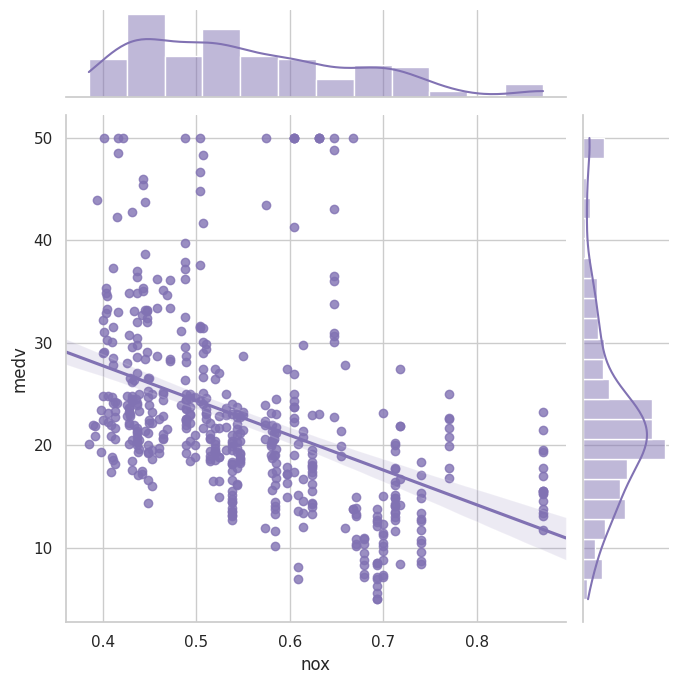

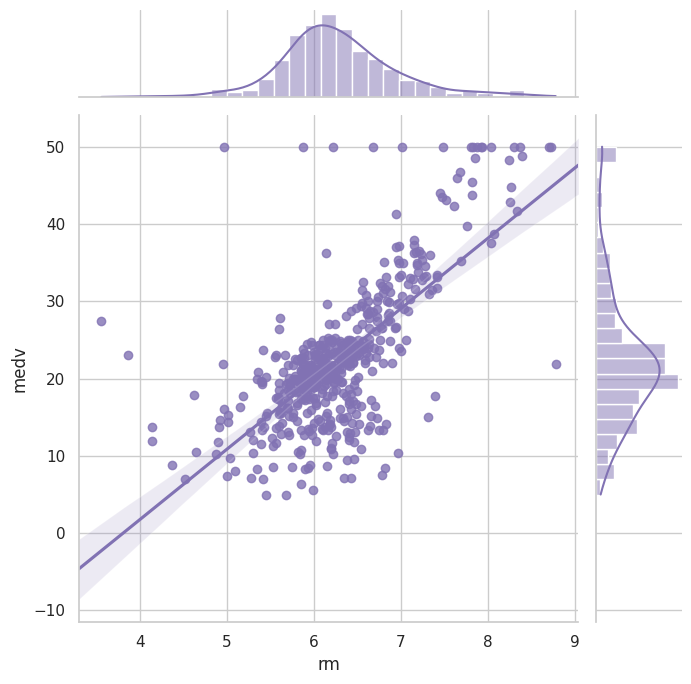

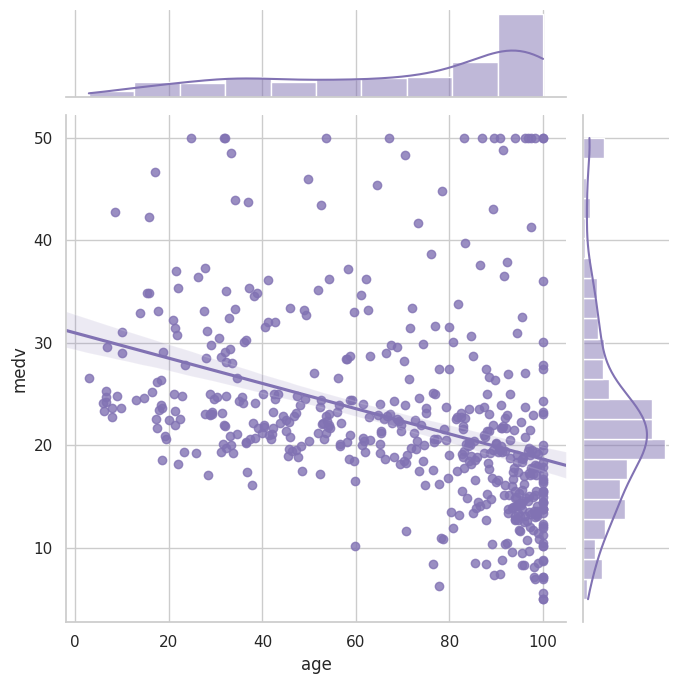

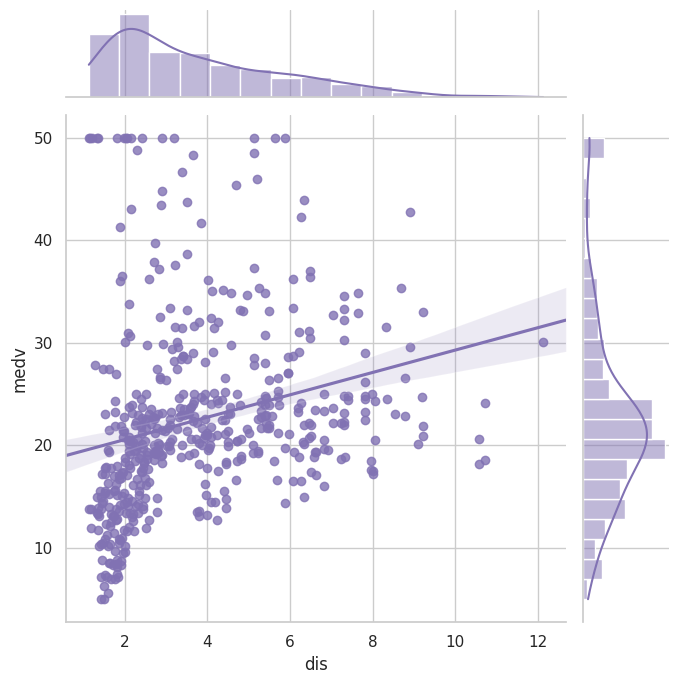

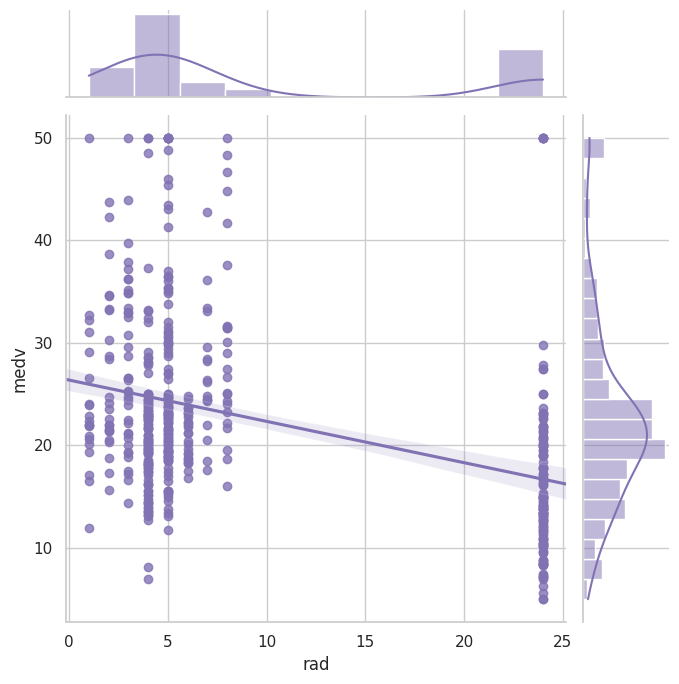

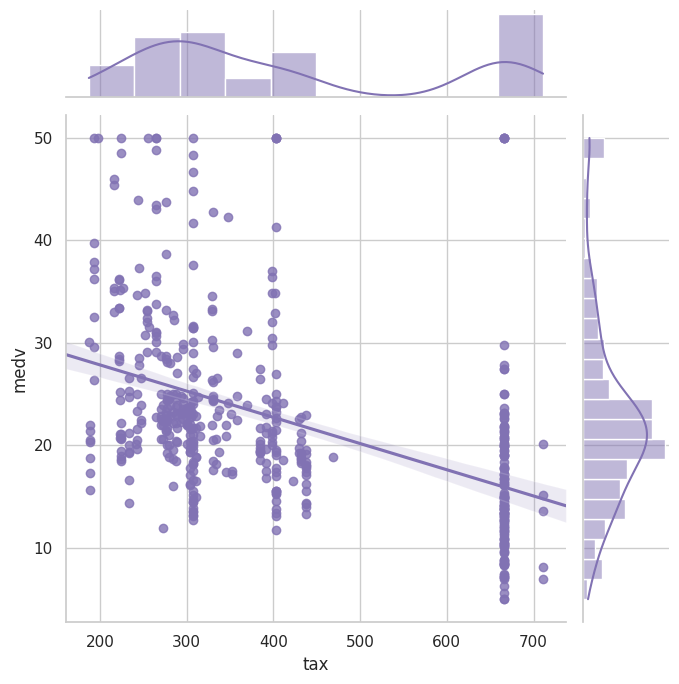

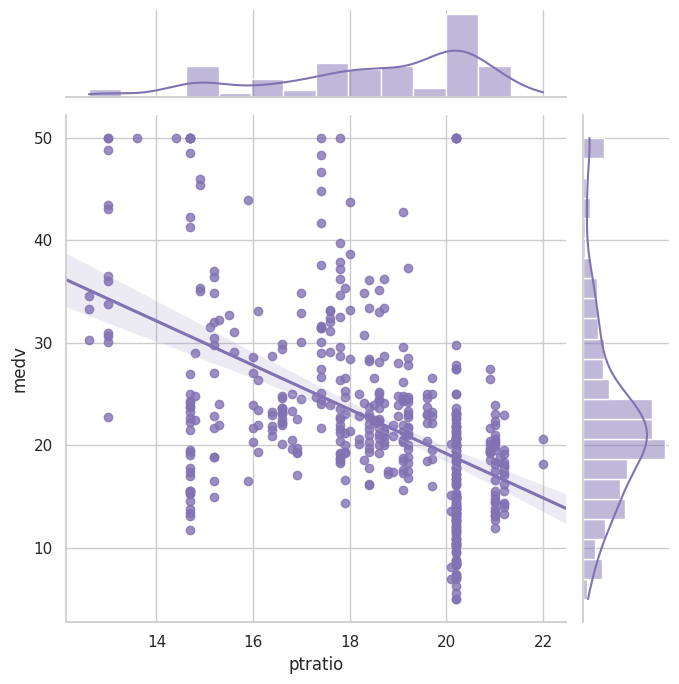

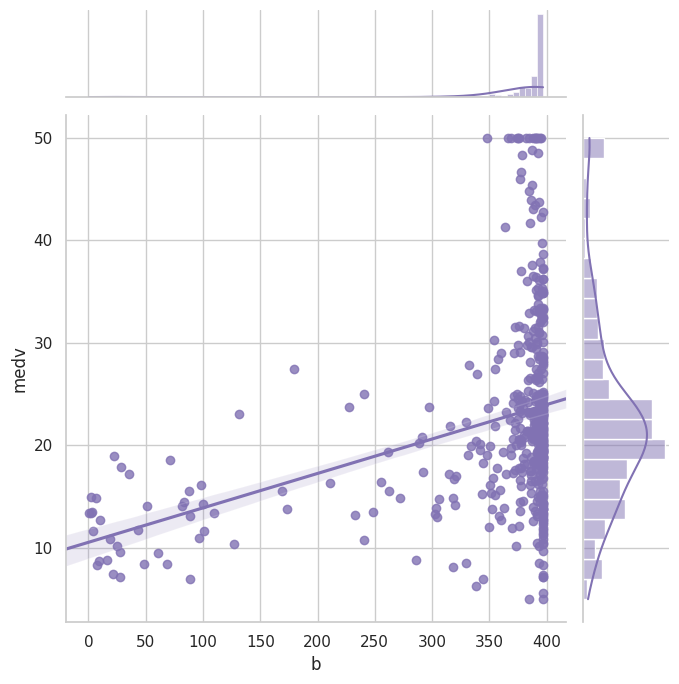

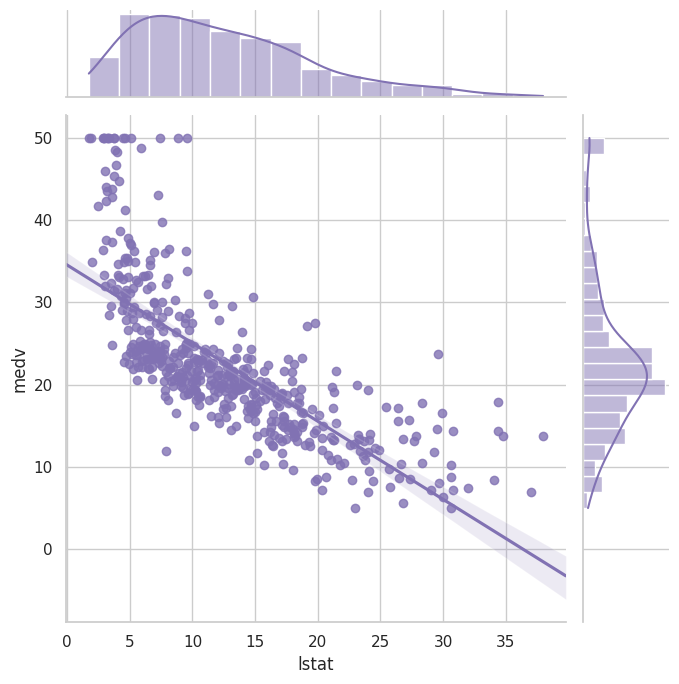

In [ ]:
# Diagrama de correlacion con la linea de tendencia
sns.set_theme(style="whitegrid")
for i in var_num:
    g = sns.jointplot(x=i, y=respuesta[0], data=data,
                      kind="reg", truncate=False,
                      color="m", height=7)

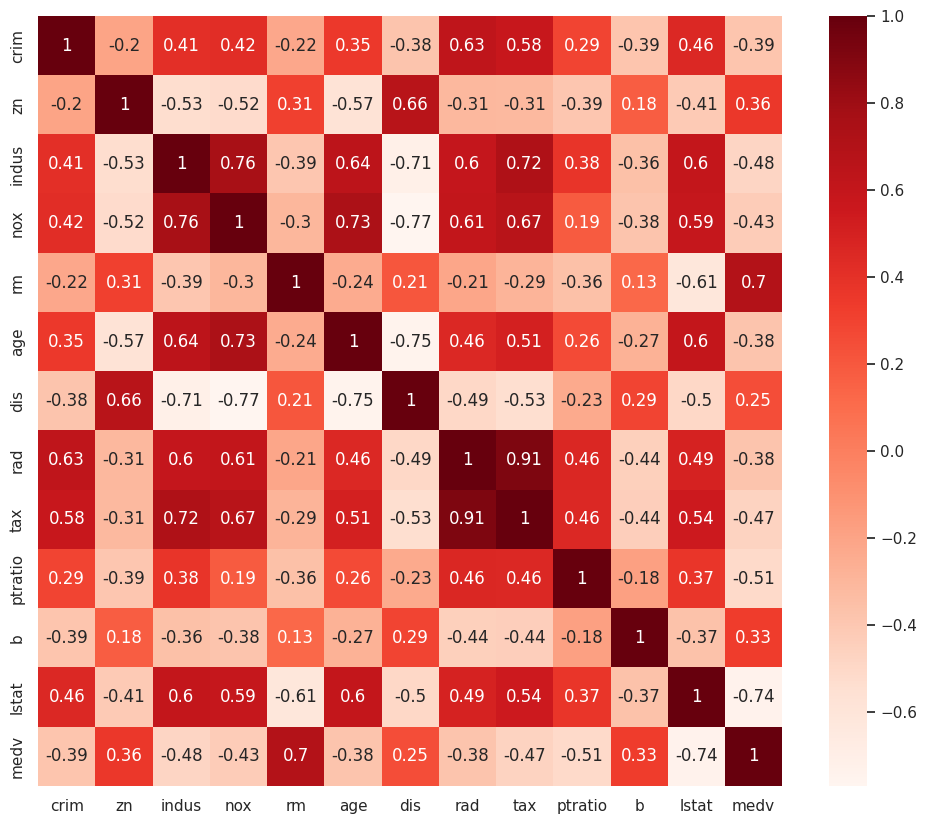

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_num_tot.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Correlación de las variables de entrada

Gráfico de correlación o correlograma para tratar de ver si hay patrones entre las variables de entrada.

<ipython-input-40-6fa05c92bfbc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(X_tot.corr(), vmin=-1, vmax=1, annot=True)


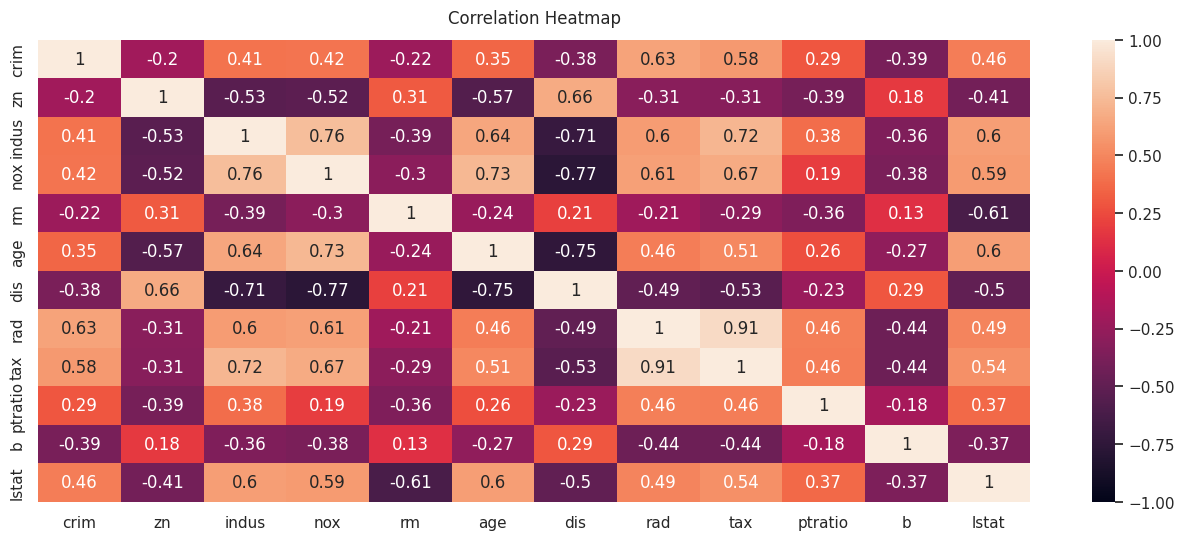

In [ ]:
# Referencia: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_tot.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

## Variables cualitativas vs la salida

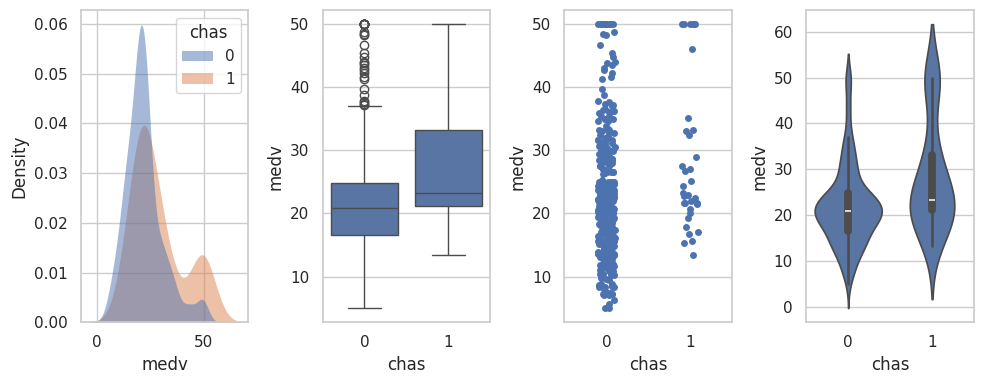

In [ ]:
# Distribuciones de las variables de numericas de entrada vs la salida:
for i in var_cual:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=respuesta[0], hue=i,
       fill=True, common_norm=False,
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=respuesta[0], x=i,ax=axs[1])
    sns.stripplot(y= respuesta[0],data=data, x =i,ax=axs[2])
    sns.violinplot(data=data, y=respuesta[0], x=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

In [ ]:
# Lo aplicariamos solo si mi variable respuesta es discreta y con pocos grupos. Por ejemplo: escala de Lickert 0-10
## Descripcion numerica de las variables numericas por grupo de la respuesta
#df1=(data.drop(var_cual, axis=1).groupby(respuesta[0])
#         .describe()
#         .unstack()
#         .unstack(1)
#         .reindex(data.columns[1:], level=0))
#df1

# Selección del data frame de entrada y salida

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Seleccionar variables de entrada y variable de salida y pasarlas a numericas:

X_ = X_tot.apply(pd.to_numeric, errors='ignore') # variables de entrada (Se pasan todas a numeros)
y_ = y.astype('int64') # cambiar el tipo de variable a numerica

# Feature selection - selección de variables

1. Feature selection univariada ( Correlación de Pearson o Spearman = Cuantitativa vs salida o  ANOVA o Kruskall Wallis = Cualitativas vs salida, MI = Mutual information)

- Quitar las variables con MI = 0
- Quitar las variables con p-valores >25% = 0.25


2. Feature selection multivariado:
- RFE - recursive feature elimination RANDOM FOREST
- Modelo de regresión lineal múltiple mejor modelo según el BIC. --> con pocos datos y pocas variables
- Boruta - rfe mejorado

## Filtro univariado - Mutual Information

In [ ]:
#from sklearn.feature_selection import mutual_info_classif

a = mutual_info_classif(X_tot,y.astype('int64'))
b = X_tot.columns
mutualinfo = pd.DataFrame(a,b,columns =["Mutual_Information"])
mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)

,Mutual_Information
lstat,0.664158
indus,0.539254
rm,0.477160
ptratio,0.472653
nox,0.467351
tax,0.453277
crim,0.413755
age,0.361827
dis,0.322958
rad,0.287465


<ipython-input-36-5c2368f36980>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)["Mutual_Information"],


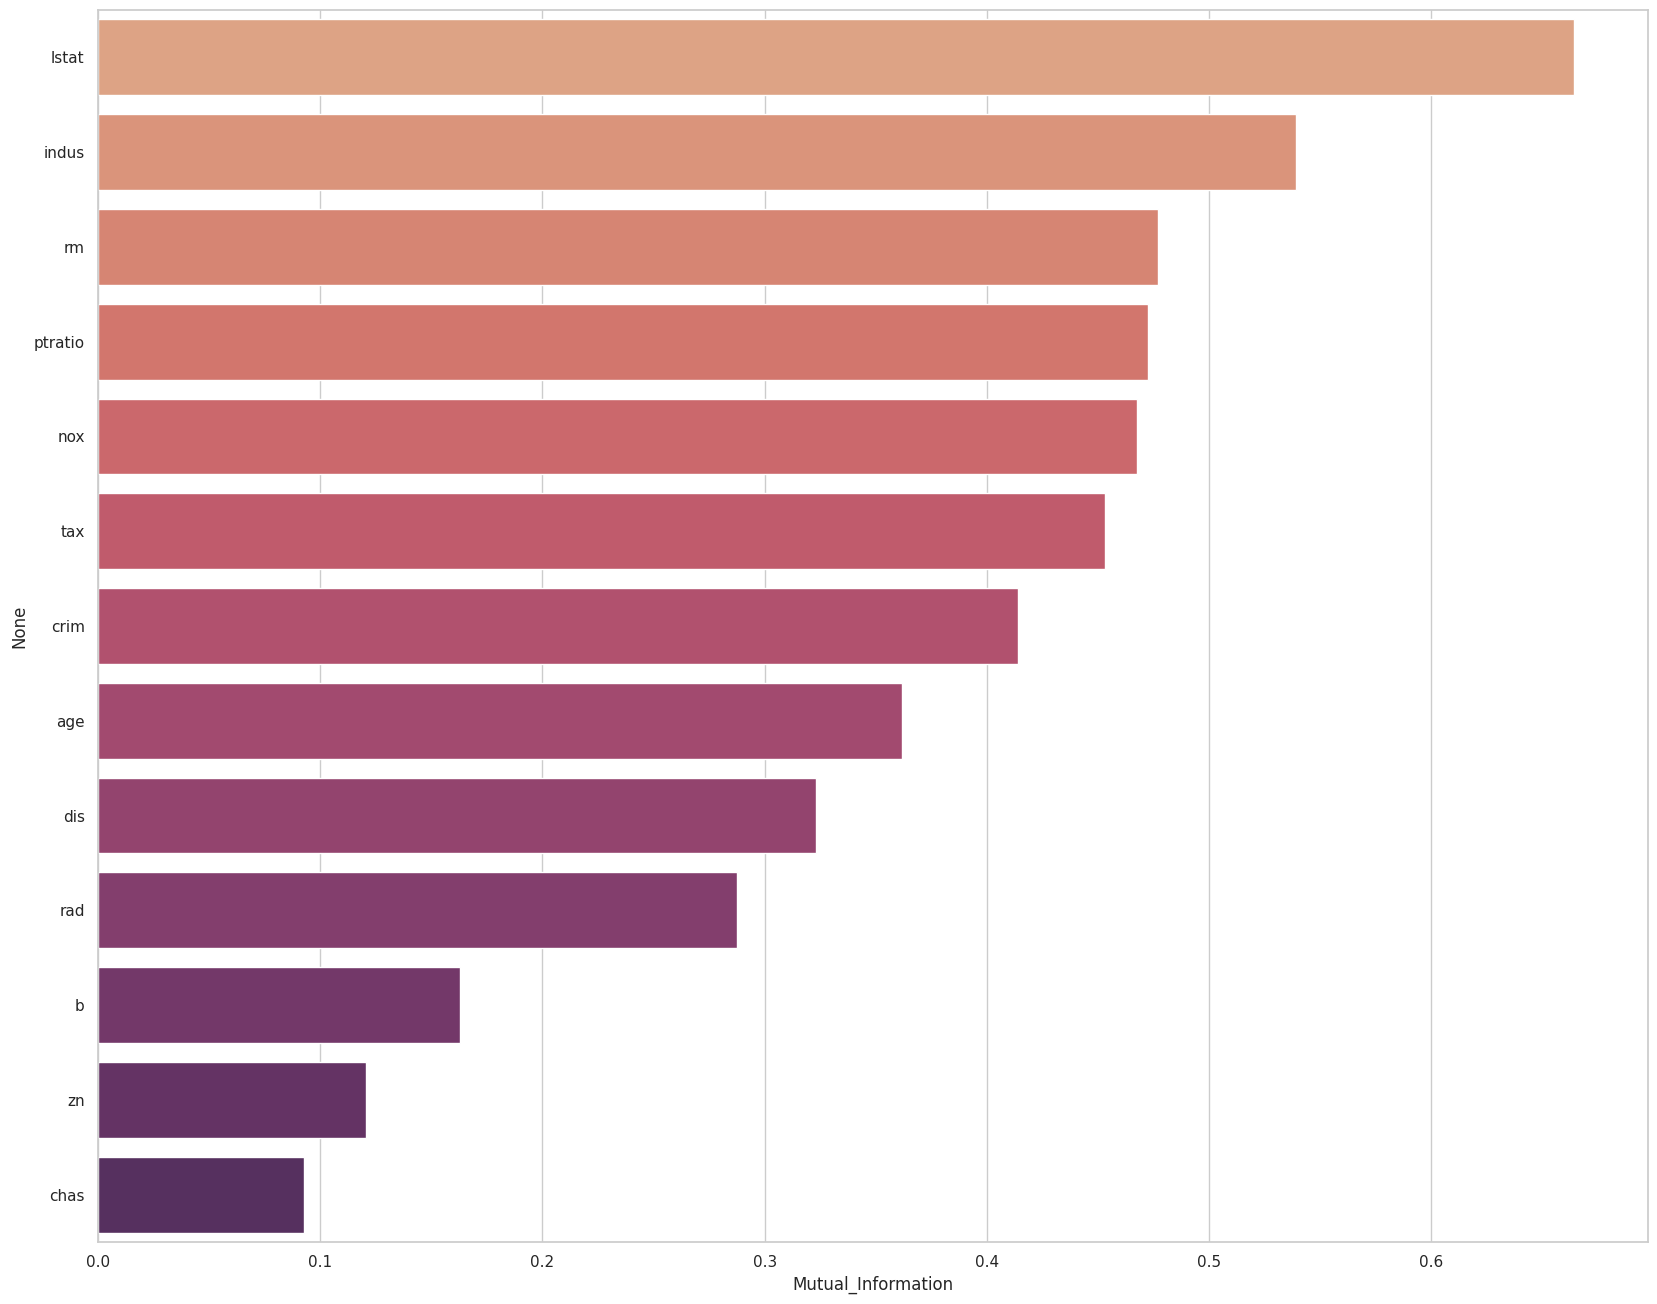

In [ ]:
# Plot de la mutual information
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 16))
sns.barplot(x = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)["Mutual_Information"],
            y = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False).index,
            palette ="flare",
            data=mutualinfo)
plt.show()

## Filtro univariado - Ranking de la correlación

In [ ]:
# Correlacion en valor absoluta de la variable de salida
cor = X_num_tot.corr(method = 'spearman')
cor_target = abs(cor[respuesta])
cor_target = cor_target.sort_values(by = [respuesta[0]], ascending = 0)
cor_target

,medv
medv,1.000000
lstat,0.852914
rm,0.633576
indus,0.578255
nox,0.562609
tax,0.562411
crim,0.558891
ptratio,0.555905
age,0.547562
dis,0.445857


## Filtro univariado - Ranking de comparación medias variables cualitativas vs salida

In [ ]:
#from sklearn.feature_selection import f_classif

## ANOVA
c = np.array(f_classif(X_cual,y))
d = X_cual.columns

anova = pd.DataFrame(np.transpose(c), index = d, columns = ["f_statistic","p_value"])
anova.sort_values(by = ["p_value"], ascending = 1)

,f_statistic,p_value
chas,1.102329,0.219231


## Conclusiones del filtro univariado

Las vatiables lstat, indus, rm seguramente serán variables seleccionadas en caso de que no estén correladas entre si.

## Filtro multivariado - mejor modelo de regresión según el BIC

In [ ]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

BIC_models = pd.DataFrame(0, index=range(len(X_.columns)-1), columns = ["Num_Variables","BIC"])
lnreg = LinearRegression()


# Calculo del BIC con la iteracion i-esima
for i in np.arange(1,len(X_.columns),1):
    # Aplicar el RFE con i-variables
    rfe = RFE(lnreg, n_features_to_select=i)
    rfe = rfe.fit(X_,y_)
    print(rfe.support_)
    print(rfe.ranking_)

    # Seleccionar las variables de entrada
    X_RFE = X_[X_.columns[rfe.support_]]
    X_RFE.head()

    # Calcular el modelo logistico con las variables seleccionadas
    lm_model_i = sm.OLS(y_, sm.add_constant(X_RFE)).fit()
    lm_model_i.summary()

    # Calcular el BIC del modelo logistico
    BIC_models.iloc[(i-1)] = [i,lm_model_i.bic]

[False False False False  True False False False False False False False
 False]
[ 8 10  9  3  1  2 13  5  7 11  4 12  6]
[False False False False  True  True False False False False False False
 False]
[ 7  9  8  2  1  1 12  4  6 10  3 11  5]
[False False False  True  True  True False False False False False False
 False]
[ 6  8  7  1  1  1 11  3  5  9  2 10  4]
[False False False  True  True  True False False False False  True False
 False]
[ 5  7  6  1  1  1 10  2  4  8  1  9  3]
[False False False  True  True  True False  True False False  True False
 False]
[4 6 5 1 1 1 9 1 3 7 1 8 2]
[False False False  True  True  True False  True False False  True False
  True]
[3 5 4 1 1 1 8 1 2 6 1 7 1]
[False False False  True  True  True False  True  True False  True False
  True]
[2 4 3 1 1 1 7 1 1 5 1 6 1]
[ True False False  True  True  True False  True  True False  True False
  True]
[1 3 2 1 1 1 6 1 1 4 1 5 1]
[ True False  True  True  True  True False  True  True False  True False
  T

In [ ]:
# BIC de todos los modelos
BIC_models

,Num_Variables,BIC
0,1,3596.131344
1,2,3317.391264
2,3,3300.629861
3,4,3233.841252
4,5,3215.148680
5,6,3094.076871
6,7,3097.778341
7,8,3093.486061
8,9,3098.175519
9,10,3097.143314


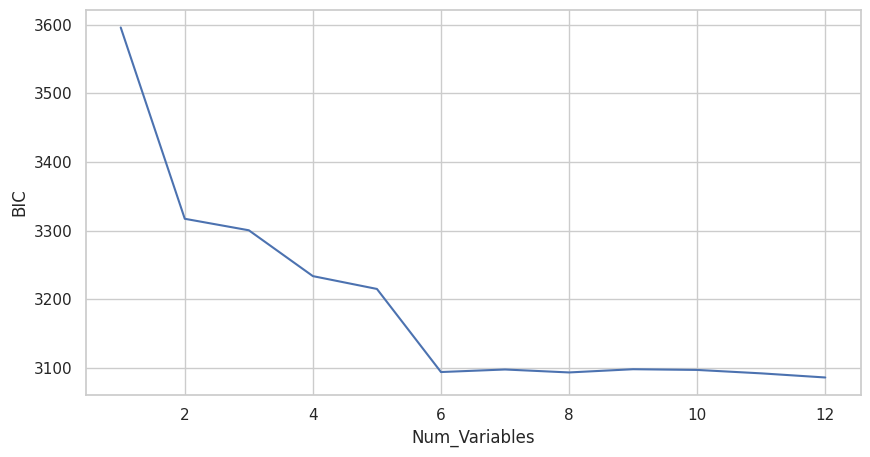

In [ ]:
sns.lineplot(data=BIC_models, x="Num_Variables", y="BIC")
plt.show()

In [ ]:
# Numero de variables optimo:
n_variables = BIC_models["BIC"].idxmin()+1
print("Numero de variables óptimo:")
n_variables

Numero de variables óptimo:


12

In [ ]:
# Calculamos el modelo con el RFE con el numero de variables seleccionadas
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

lmreg = LinearRegression()
rfe = RFE(lmreg,n_features_to_select = n_variables)

rfe = rfe.fit(X_,y_)

In [ ]:
# Seleccionar las variables de entrada del modelo de RFE
X_RFE_BIC = X_[X_.columns[rfe.support_]]
X_RFE_BIC.head()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33


In [ ]:
# Calculo del modelo con las variables seleccionadas
lm_model_i = sm.OLS(y_, sm.add_constant(X_RFE_BIC)).fit()
lm_model_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     116.5
Date:                Wed, 27 Mar 2024   Prob (F-statistic):          2.20e-135
Time:                        16:24:42   Log-Likelihood:                -1502.6
No. Observations:                 506   AIC:                             3031.
Df Residuals:                     493   BIC:                             3086.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3031      5.118      7.093      0.000      26.247      46.359
crim          -0.1057      0.033     -3.197      0.001      -0.171      -0.041
zn             0.0466      0.014      3.395      0.001       0.020       0.074
indus          0.0302      0.062      0.489      0.625      -0.091       0.152
chas           2.7692      0.866      3.197      0.001       1.068       4.471
nox          -18.2684      3.707     -4.928      0.000     -25.552     -10.985
rm             3.8384      0.412      9.327      0.000       3.030       4.647
dis           -1.4901      0.192     -7.759      0.000      -1.867      -1.113
rad            0.3061      0.067      4.598      0.000       0.175       0.437
tax           -0.0124      0.004     -3.278      0.001      -0.020      -0.005
ptratio       -0.9616      0.131     -7.325      0.000      -1.220      -0.704
b              0.0094      0.003      3.475      0.001       0.004       0.015
lstat         -0.5260      0.048    -10.962      0.000      -0.620      -0.432
==============================================================================
Omnibus:                      181.114   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.164
Skew:                           1.536   Prob(JB):                    3.99e-180
Kurtosis:                       8.454   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Filtro multivariado según RFE

Primero vamos a calcular un RFE con random forest.

Segundo método que vamos a utilizar es el Boruta. Boruta una estrategia para mejorar los problemas que tiene en el RFE.

### RFE con random forest

Optimal number of features : 10


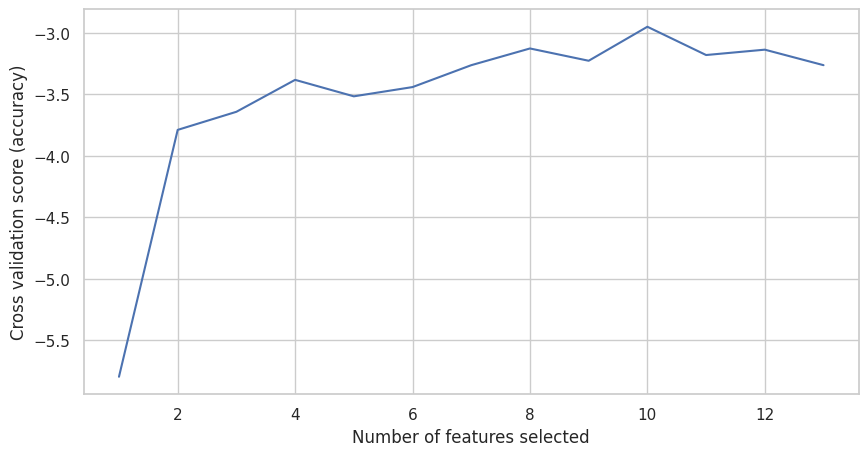

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold


# Create the RFE object and compute a cross-validated score.
#svc = SVR(kernel="linear")
#svc = AdaBoostRegressor()
svc = RandomForestRegressor(n_estimators=10)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=KFold(5),
    scoring='neg_mean_absolute_error',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_, y_)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score'],
)
plt.show()

In [ ]:
# Seleccionamos las variables con RFE-SVM
X_RFE_RF = X_.loc[:,rfecv.support_].copy()
X_RFE_RF.head()

,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33


### RFE con SVM

Optimal number of features : 13


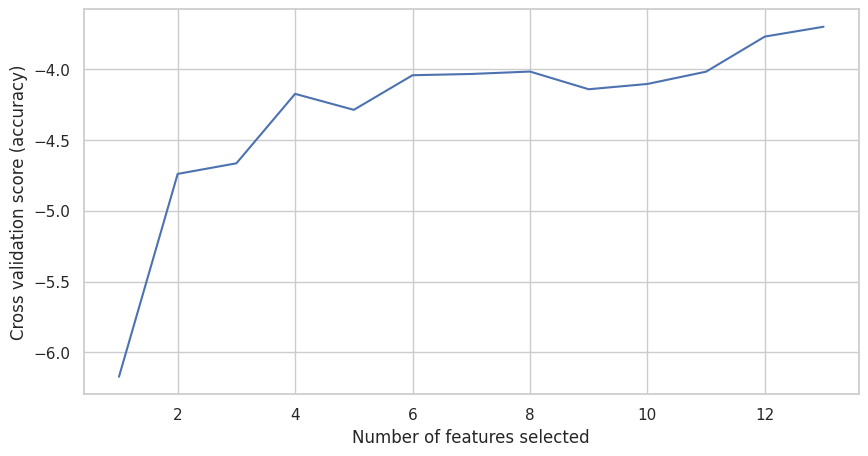

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold


# Create the RFE object and compute a cross-validated score.
svc = SVR(kernel="linear")
#svc = AdaBoostRegressor()
#svc = RandomForestRegressor(n_estimators=10)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=KFold(5),
    scoring='neg_mean_absolute_error',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_, y_)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score'],
)
plt.show()

In [ ]:
# Seleccionamos las variables con RFE-SVM
X_RFE_SVM = X_.loc[:,rfecv.support_].copy()
X_RFE_SVM.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## Filtro multivariado - BORUTA

## BORUTA sin estandarizar

In [ ]:
!pip install Boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 939.3 kB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy


np.int = np.int32
np.float = np.float64
np.bool = np.bool_


# definimos el random forest clasificador
randomForest = RandomForestRegressor(n_jobs = -1, max_depth = 4)
randomForest.fit(X_, y_)

# define Boruta feature selection
feature_selection = BorutaPy(randomForest, n_estimators = 'auto', verbose = 1,
                             random_state = 16, max_iter= 200)

In [ ]:
# Get relevant features
feature_selection.fit(np.array(X_), np.array(y_))

Iteration: 1 / 200
Iteration: 2 / 200
Iteration: 3 / 200
Iteration: 4 / 200
Iteration: 5 / 200
Iteration: 6 / 200
Iteration: 7 / 200
Iteration: 8 / 200
Iteration: 9 / 200
Iteration: 10 / 200
Iteration: 11 / 200
Iteration: 12 / 200
Iteration: 13 / 200
Iteration: 14 / 200
Iteration: 15 / 200
Iteration: 16 / 200
Iteration: 17 / 200
Iteration: 18 / 200
Iteration: 19 / 200
Iteration: 20 / 200
Iteration: 21 / 200
Iteration: 22 / 200
Iteration: 23 / 200
Iteration: 24 / 200
Iteration: 25 / 200
Iteration: 26 / 200
Iteration: 27 / 200
Iteration: 28 / 200
Iteration: 29 / 200
Iteration: 30 / 200
Iteration: 31 / 200
Iteration: 32 / 200
Iteration: 33 / 200
Iteration: 34 / 200
Iteration: 35 / 200
Iteration: 36 / 200
Iteration: 37 / 200
Iteration: 38 / 200
Iteration: 39 / 200
Iteration: 40 / 200
Iteration: 41 / 200
Iteration: 42 / 200
Iteration: 43 / 200
Iteration: 44 / 200
Iteration: 45 / 200
Iteration: 46 / 200


BorutaPy finished running.

Iteration: 	47 / 200
Confirmed: 	9
Tentative: 	0
Rejected: 

BorutaPy(estimator=RandomForestRegressor(max_depth=4, n_estimators=111,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7FCDECD7CE40),
         max_iter=200, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FCDECD7CE40, verbose=1)

In [ ]:
# Getting all relevant features
feature_selection.support_

array([ True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True])

In [ ]:
# Getting feature ranking
feature_selection.ranking_

array([1, 5, 2, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Creating list of varibale name, ranks, and final decision using zip
feature_rankings = list(zip(X_.columns,
                           feature_selection.ranking_,
                           feature_selection.support_))
pd.DataFrame(feature_rankings)

,0,1,2
0,crim,1,True
1,zn,5,False
2,indus,2,False
3,chas,4,False
4,nox,1,True
5,rm,1,True
6,age,1,True
7,dis,1,True
8,rad,3,False
9,tax,1,True


In [ ]:
# seleccionamos las variables

# Seleccionamos las variables con RFE-SVM
X_Boruta = X_.loc[:,feature_selection.support_].copy()
X_Boruta.head()

,crim,nox,rm,age,dis,tax,ptratio,b,lstat
0,0.00632,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33


### BORUTA estandarizando

In [ ]:
from boruta import BorutaPy

# Estandarizamos los datos de entrada:
X_std = X_.copy()
X_std = StandardScaler().fit_transform(X_).copy()


# definimos el random forest clasificador
randomForest = RandomForestRegressor(n_jobs = -1, max_depth = 4)
randomForest.fit(X_std, y_)

# define Boruta feature selection
feature_selection = BorutaPy(randomForest, n_estimators = 'auto', verbose = 1,
                             random_state = 16, max_iter= 200)

In [ ]:
# Get relevant features
feature_selection.fit(np.array(X_std), np.array(y_))

Iteration: 1 / 200
Iteration: 2 / 200
Iteration: 3 / 200
Iteration: 4 / 200
Iteration: 5 / 200
Iteration: 6 / 200
Iteration: 7 / 200
Iteration: 8 / 200
Iteration: 9 / 200
Iteration: 10 / 200
Iteration: 11 / 200
Iteration: 12 / 200
Iteration: 13 / 200
Iteration: 14 / 200
Iteration: 15 / 200
Iteration: 16 / 200
Iteration: 17 / 200
Iteration: 18 / 200
Iteration: 19 / 200
Iteration: 20 / 200
Iteration: 21 / 200
Iteration: 22 / 200
Iteration: 23 / 200
Iteration: 24 / 200
Iteration: 25 / 200
Iteration: 26 / 200
Iteration: 27 / 200
Iteration: 28 / 200
Iteration: 29 / 200
Iteration: 30 / 200
Iteration: 31 / 200
Iteration: 32 / 200
Iteration: 33 / 200
Iteration: 34 / 200
Iteration: 35 / 200
Iteration: 36 / 200
Iteration: 37 / 200
Iteration: 38 / 200
Iteration: 39 / 200
Iteration: 40 / 200
Iteration: 41 / 200
Iteration: 42 / 200
Iteration: 43 / 200
Iteration: 44 / 200
Iteration: 45 / 200
Iteration: 46 / 200


BorutaPy finished running.

Iteration: 	47 / 200
Confirmed: 	9
Tentative: 	0
Rejected: 

BorutaPy(estimator=RandomForestRegressor(max_depth=4, n_estimators=111,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7FCDECD7D640),
         max_iter=200, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FCDECD7D640, verbose=1)

In [ ]:
# Creating list of varibale name, ranks, and final decision using zip
feature_rankings = list(zip(X_.columns,
                           feature_selection.ranking_,
                           feature_selection.support_))
pd.DataFrame(feature_rankings)

,0,1,2
0,crim,1,True
1,zn,5,False
2,indus,2,False
3,chas,4,False
4,nox,1,True
5,rm,1,True
6,age,1,True
7,dis,1,True
8,rad,3,False
9,tax,1,True


In [ ]:
# seleccionamos las variables

# Seleccionamos las variables con RFE-SVM
X_Boruta_std = X_.loc[:,feature_selection.support_].copy()
X_Boruta_std.head()

,crim,nox,rm,age,dis,tax,ptratio,b,lstat
0,0.00632,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33


# Training

Para entrenar necesitamos seguir unos pasos muy mecánicos pero siempre hay que estar abierto a probar y testear hasta encontra la "mejor" opción.

Los pasos del training para un caso de clasificación:

1. Data split - partición de los datos
2. Definir el training: tipo de subsampling, tipos de transformaciones
3. Training de algoritmos sencillos - baseline
4. Training de algoritmos avanzados (ENSEMBLE ALGORITHMS - boosting o de bagging)
5. Optimizar del mejor algoritmo sencillo
6. Optimizar el mejor algoritmo avanzado

## Data split - partición de los datos

Normalmente 70-30 u 80-20.

In [ ]:
# Seleccionamos los datos de la seleccion de variables.

#X_sel = X_RFE_RF # RFE con random forest
#X_sel = X_RFE_BIC # RFE con linear regression con seleccion via BIC
#X_sel = X_RFE_SVM # RFE con SVM
#X_sel = X_Boruta.copy() # Boruta sin estandarizar
X_sel = X_Boruta_std.copy() # Boruta estandarizado

In [ ]:
validation_size = 0.20 # el % de datos para validar
seed = 7 # el numero aleatorio para generar la partición
X_train, X_validation, Y_train, Y_validation = train_test_split(X_sel, y_, test_size=validation_size, random_state=seed)

In [ ]:
len(X_train)/5

80.8

## Definir las características del training

Hay varias opciones de subsmapling para evitar el overfitting del algoritmo.

    •	Crear 10 grupos de 3 repeticiones – k-fold
    •	Crear 100 nuevos grupos generando la muestra a partir de la distribución de training data- bootstraping
    •	Quitar una variable de entrada cada vez – LOOCV

El más común y utilizado es el k-fold validation.

Las trasnformaciones más comunes son:
- La estandarización de los datos
- Las trasnformaciones de Yule-Johnson y Box-Cox (normalizar los datos para variables cuantitativas y positivas)
- El principal component analysis (PCA)

In [ ]:
# Defenimos el subsampling y el seed number
num_folds = 5
seed = 7
scoring = 'r2'

## Training de algoritmos básicos sin ESTANDARIZAR

Primer cálculo de algoritmos de baseline.
A partir de estos resultados lo más probable es que los mejoremos.

Hacemos un primer cálculo sin estandarizar.

Estos son los algorimos básicos de baseline que te propongo:
- Linear regression - LR
- Linear regresion con regularización elástica - LASSO
- Los k vecinos mas cercanos - KNN
- Árbol de regresióne - CART
- Support vector machine radial - SVR

In [ ]:
# Definimos los algoritmos basicos
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

In [ ]:
# evaluamos los algoritmos basicos
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    import sklearn.metrics as metrics
    print(msg)
    print('Resultados de training:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae = metrics.mean_absolute_error(Y_train, y_pred)
    mse = metrics.mean_squared_error(Y_train, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_train,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print('Resultados de test:')
    y_pred = model.predict(X_validation)
    mae = metrics.mean_absolute_error(Y_validation, y_pred)
    mse = metrics.mean_squared_error(Y_validation,y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_validation,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print("-------------------")


LR: 0.719458 (0.101857)
Resultados de training:
MAE: 3.1725885834598206
MSE: 21.32983130442137
RMSE: 4.618423032207137
R-Squared: 0.7521558939602985
-------------------
Resultados de test:
MAE: 3.9540478744041447
MSE: 38.68439411173065
RMSE: 6.219677974922066
R-Squared: 0.5282484966348678
-------------------
-------------------
LASSO: 0.680389 (0.052123)
Resultados de training:
MAE: 3.614518845439562
MSE: 25.900046725557637
RMSE: 5.089208850652294
R-Squared: 0.6990518192353575
-------------------
Resultados de test:
MAE: 3.7736643664278295
MSE: 33.07379391308513
RMSE: 5.7509819955452075
R-Squared: 0.5966690868823732
-------------------
-------------------
KNN: 0.514474 (0.086411)
Resultados de training:
MAE: 3.457920792079208
MSE: 25.409405940594063
RMSE: 5.040774339384185
R-Squared: 0.7047528688592573
-------------------
Resultados de test:
MAE: 4.537254901960783
MSE: 42.53098039215686
RMSE: 6.521578059960401
R-Squared: 0.4813398425824449
-------------------
-------------------
CART: 

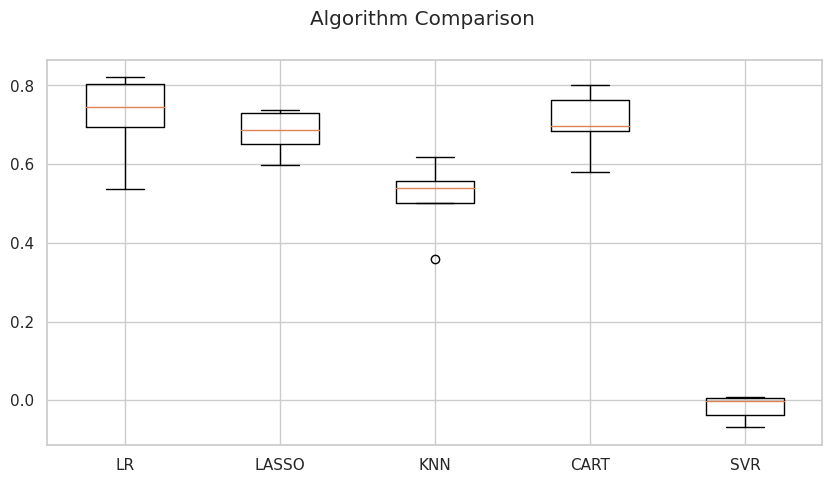

In [ ]:
# Comparamos los algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Training de algoritmos básicos ESTANDARIZADOS

Primer cálculo de algoritmos de baseline.
A partir de estos resultados lo más probable es que los mejoremos.

Hacemos un primer cálculo sin estandarizar.

Estos son los algorimos básicos de baseline que te propongo:
- Linear regression - LR
- Linear regresion con regularización elástica - LASSO
- Los k vecinos mas cercanos - KNN
- Árbol de clasificación - CART
- Support vector machine radial - SVR

In [ ]:
# Definimos el pipeline con estandarizacion y el modelo:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(gamma='auto'))])))

In [ ]:
# Evaluamos los algoritmos:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    import sklearn.metrics as metrics
    print(msg)
    print('Resultados de training:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae = metrics.mean_absolute_error(Y_train, y_pred)
    mse = metrics.mean_squared_error(Y_train, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_train,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print('Resultados de test:')
    y_pred = model.predict(X_validation)
    mae = metrics.mean_absolute_error(Y_validation, y_pred)
    mse = metrics.mean_squared_error(Y_validation,y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_validation,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print("-------------------")

ScaledLR: 0.719458 (0.101857)
Resultados de training:
MAE: 3.1725885834598078
MSE: 21.32983130442137
RMSE: 4.618423032207137
R-Squared: 0.7521558939602985
-------------------
Resultados de test:
MAE: 3.954047874404141
MSE: 38.68439411173102
RMSE: 6.219677974922095
R-Squared: 0.5282484966348633
-------------------
-------------------
ScaledLASSO: 0.678579 (0.071406)
Resultados de training:
MAE: 3.5720387641838816
MSE: 25.82500462378699
RMSE: 5.0818308338419715
R-Squared: 0.6999237784348112
-------------------
Resultados de test:
MAE: 4.000689624940725
MSE: 41.00741941601281
RMSE: 6.403703570279687
R-Squared: 0.499919484256255
-------------------
-------------------
ScaledEN: 0.665232 (0.064539)
Resultados de training:
MAE: 3.693641567671423
MSE: 27.782369782849734
RMSE: 5.270898384796442
R-Squared: 0.6771799783963832
-------------------
Resultados de test:
MAE: 3.9841034787698146
MSE: 40.74890480882631
RMSE: 6.383486884832326
R-Squared: 0.5030720385971564
-------------------
-----------

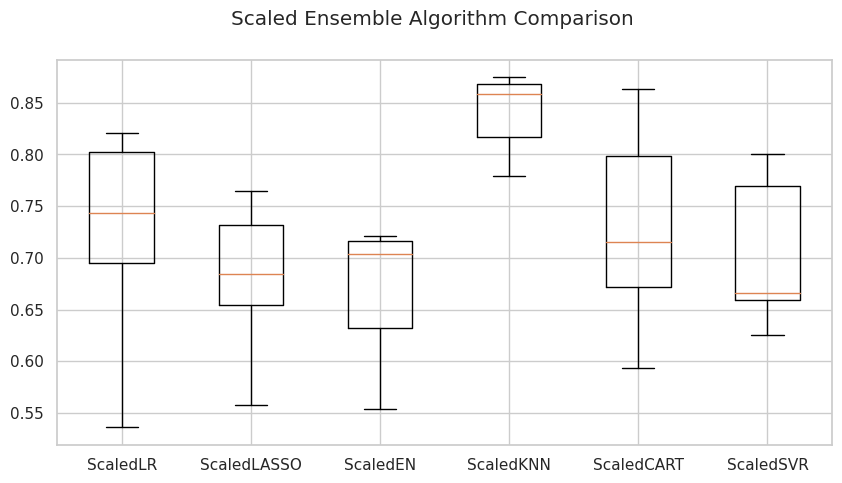

In [ ]:
# Comparamos los algoritmos
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Ejemplo tunnig KNN

In [ ]:
# Estandarizamos los datos de entrada:
X_train_std = X_train.copy()
X_train_std = StandardScaler().fit_transform(X_train).copy()
X_train_std = pd.DataFrame(X_train_std)
X_train_std.columns = X_train.columns

X_validation_std = X_validation.copy()
X_validation_std = StandardScaler().fit_transform(X_validation).copy()
X_validation_std = pd.DataFrame(X_validation_std)
X_validation_std.columns = X_validation.columns

In [ ]:
cv = StratifiedKFold(n_splits=5)
hp_candidates = [{'n_neighbors': list(range(1,30)), 'weights': ['uniform','distance']}]
algorithm = KNeighborsRegressor()

searchCV = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')

searchCV.fit(X_train_std, Y_train)

# Get the results
print(searchCV.best_score_)
print(searchCV.best_estimator_)
print(searchCV.best_params_)

0.8755078061459715
KNeighborsRegressor(n_neighbors=3, weights='distance')
{'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
    print('Resultados de training:')
    y_pred = searchCV.predict(X_train_std)
    mae = metrics.mean_absolute_error(Y_train, y_pred)
    mse = metrics.mean_squared_error(Y_train, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_train,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print('Resultados de test:')
    y_pred = searchCV.predict(X_validation_std)
    mae = metrics.mean_absolute_error(Y_validation, y_pred)
    mse = metrics.mean_squared_error(Y_validation, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_validation,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")

Resultados de training:
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R-Squared: 1.0
-------------------
Resultados de test:
MAE: 2.6961270716064223
MSE: 22.68634215210614
RMSE: 4.763018176755799
R-Squared: 0.7233428036845879
-------------------


## Training algoritmos de ensemble SIN ESTANDARIZAR

In [ ]:
# Definimos los algoritmos
ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('GBM', GradientBoostingRegressor()))
ensembles.append(('RF', RandomForestRegressor(n_estimators=10)))
ensembles.append(('ET', ExtraTreesRegressor(n_estimators=10)))

In [ ]:
# entrenamos los algoritmos
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    import sklearn.metrics as metrics
    print(msg)
    print('Resultados de training:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae = metrics.mean_absolute_error(Y_train, y_pred)
    mse = metrics.mean_squared_error(Y_train, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_train,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print('Resultados de test:')
    y_pred = model.predict(X_validation)
    mae = metrics.mean_absolute_error(Y_validation, y_pred)
    mse = metrics.mean_squared_error(Y_validation,y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_validation,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print("-------------------")

AB: 0.815006 (0.037916)
Resultados de training:
MAE: 2.321055218551053
MSE: 8.010592896873376
RMSE: 2.8302990825835663
R-Squared: 0.906920115445919
-------------------
Resultados de test:
MAE: 2.84925157448401
MSE: 19.83701344109968
RMSE: 4.453876226513224
R-Squared: 0.7580900223980671
-------------------
-------------------
GBM: 0.871043 (0.046613)
Resultados de training:
MAE: 1.06718335640422
MSE: 1.8400027463097397
RMSE: 1.3564670089278765
R-Squared: 0.9786199042429743
-------------------
Resultados de test:
MAE: 2.2274286051062253
MSE: 11.20428283796402
RMSE: 3.347279916284866
R-Squared: 0.863365127093076
-------------------
-------------------
RF: 0.840209 (0.050736)
Resultados de training:
MAE: 0.9235148514851484
MSE: 1.9799752475247523
RMSE: 1.4071159325104496
R-Squared: 0.9769934797795711
-------------------
Resultados de test:
MAE: 2.6578431372549023
MSE: 17.881274509803927
RMSE: 4.228625605300607
R-Squared: 0.7819400219189
-------------------
-------------------
ET: 0.878852 

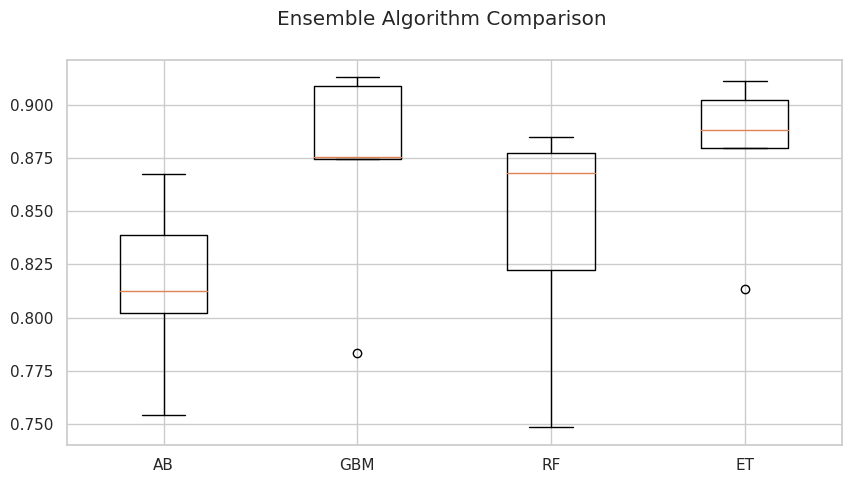

In [ ]:
# Comparamos los algoritmos
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Training algoritmos de ensemble ESTANDARIZADOS

In [ ]:
# Definimos los algoritmos
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))
ensembles.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBRegressor())])))
ensembles.append(('ScaledLGBM', Pipeline([('Scaler', StandardScaler()),('LGBM', LGBMRegressor())])))


In [ ]:
# entrenamos los algoritmos
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    import sklearn.metrics as metrics
    print(msg)
    print('Resultados de training:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae = metrics.mean_absolute_error(Y_train, y_pred)
    mse = metrics.mean_squared_error(Y_train, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_train,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print('Resultados de test:')
    y_pred = model.predict(X_validation)
    mae = metrics.mean_absolute_error(Y_validation, y_pred)
    mse = metrics.mean_squared_error(Y_validation,y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_validation,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print("-------------------")

ScaledAB: 0.819997 (0.038903)
Resultados de training:
MAE: 2.430212771908274
MSE: 8.3882556236169
RMSE: 2.896248543135913
R-Squared: 0.9025318256578576
-------------------
Resultados de test:
MAE: 2.787147940013245
MSE: 17.560458035456236
RMSE: 4.190520019694004
R-Squared: 0.7858523399880598
-------------------
-------------------
ScaledGBM: 0.869479 (0.048340)
Resultados de training:
MAE: 1.0671833564042201
MSE: 1.8400027463097408
RMSE: 1.356467008927877
R-Squared: 0.9786199042429743
-------------------
Resultados de test:
MAE: 2.2480556408445844
MSE: 11.967013397787117
RMSE: 3.4593371327159077
R-Squared: 0.8540637202461748
-------------------
-------------------
ScaledRF: 0.836406 (0.058262)
Resultados de training:
MAE: 0.9742574257425743
MSE: 2.3917326732673274
RMSE: 1.5465227684283627
R-Squared: 0.9722090232298737
-------------------
Resultados de test:
MAE: 2.3088235294117645
MSE: 15.195196078431373
RMSE: 3.898101599295659
R-Squared: 0.814696423234034
-------------------
---------

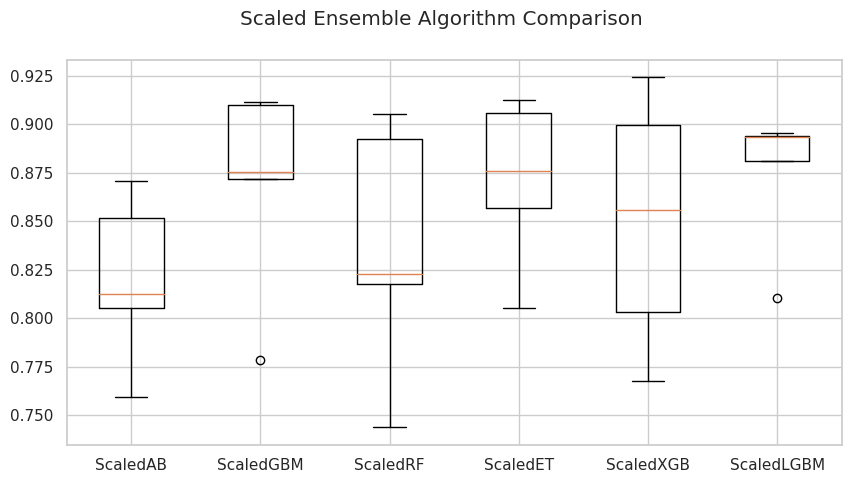

In [ ]:
# Comparamos los algoritmos
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Optimizar el algoritmo de XGBoost

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


pipeline = Pipeline([('Scaler', StandardScaler()),('model', XGBRegressor())])

cv = StratifiedKFold(n_splits=3)
param_grid = {
    "model__random_state": [0],
    "model__n_estimators": [50,75,100,150],
    "model__max_depth": [3,5]
}
searchCV = GridSearchCV(estimator=pipeline, scoring='r2', cv=cv, param_grid=param_grid, verbose=True)

# WARNING: This could take some time to run.
searchCV.fit(X_train, Y_train)

print('Best params:', searchCV.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best params: {'model__max_depth': 3, 'model__n_estimators': 150, 'model__random_state': 0}


In [ ]:
import numpy as np
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, KFold

# Utiliza el mejor estimador encontrado por GridSearchCV
opt_model = searchCV.best_estimator_

# Preparación para la validación cruzada
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
scoring = 'r2'
cv_results = cross_val_score(opt_model, X_train, Y_train, cv=kfold, scoring=scoring)

# Imprimir los resultados de la validación cruzada
print("XGBoost optimizado - Validación Cruzada: %f (%f)" % (cv_results.mean(), cv_results.std()))

# Métricas para los datos de entrenamiento
opt_model.fit(X_train, Y_train) # Ajuste con datos de entrenamiento
y_pred_train = opt_model.predict(X_train)

# Cálculo de métricas para entrenamiento
mae_train = metrics.mean_absolute_error(Y_train, y_pred_train)
mse_train = metrics.mean_squared_error(Y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(Y_train, y_pred_train)

print("Resultados de entrenamiento:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R-Squared:", r2_train)
print("-------------------")

# Métricas para los datos de validación
y_pred_val = opt_model.predict(X_validation)

# Cálculo de métricas para validación
mae_val = metrics.mean_absolute_error(Y_validation, y_pred_val)
mse_val = metrics.mean_squared_error(Y_validation, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = metrics.r2_score(Y_validation, y_pred_val)

print("Resultados de validación:")
print("MAE:", mae_val)
print("MSE:", mse_val)
print("RMSE:", rmse_val)
print("R-Squared:", r2_val)
print("-------------------")


XGBoost optimizado - Validación Cruzada: 0.870907 (0.042508)
Resultados de entrenamiento:
MAE: 0.32125125663115245
MSE: 0.18816015906530384
RMSE: 0.4337743181255707
R-Squared: 0.9978136542314724
-------------------
Resultados de validación:
MAE: 2.387085755666097
MSE: 15.451159685243395
RMSE: 3.930796316936734
R-Squared: 0.8115749780338954
-------------------


# Optimizar el Extra Tree Regressor

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


pipeline = Pipeline([('Scaler', StandardScaler()),('model', ExtraTreesRegressor())])

cv = StratifiedKFold(n_splits=3)
param_grid = {
    "model__random_state": [0],
    "model__n_estimators": [50,75,100,150],
    "model__max_depth": [3,5]
}
searchCV = GridSearchCV(estimator=pipeline, scoring='r2', cv=cv, param_grid=param_grid, verbose=True)

# WARNING: This could take some time to run.
searchCV.fit(X_train, Y_train)

print('Best params:', searchCV.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best params: {'model__max_depth': 5, 'model__n_estimators': 50, 'model__random_state': 0}


In [ ]:
import numpy as np
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, KFold

# Utiliza el mejor estimador encontrado por GridSearchCV
opt_model = searchCV.best_estimator_

# Preparación para la validación cruzada
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
scoring = 'r2'
cv_results = cross_val_score(opt_model, X_train, Y_train, cv=kfold, scoring=scoring)

# Imprimir los resultados de la validación cruzada
print("Extra Tree optimizado - Validación Cruzada: %f (%f)" % (cv_results.mean(), cv_results.std()))

# Métricas para los datos de entrenamiento
opt_model.fit(X_train, Y_train) # Ajuste con datos de entrenamiento
y_pred_train = opt_model.predict(X_train)

# Cálculo de métricas para entrenamiento
mae_train = metrics.mean_absolute_error(Y_train, y_pred_train)
mse_train = metrics.mean_squared_error(Y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(Y_train, y_pred_train)

print("Resultados de entrenamiento:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R-Squared:", r2_train)
print("-------------------")

# Métricas para los datos de validación
y_pred_val = opt_model.predict(X_validation)

# Cálculo de métricas para validación
mae_val = metrics.mean_absolute_error(Y_validation, y_pred_val)
mse_val = metrics.mean_squared_error(Y_validation, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = metrics.r2_score(Y_validation, y_pred_val)

print("Resultados de validación:")
print("MAE:", mae_val)
print("MSE:", mse_val)
print("RMSE:", rmse_val)
print("R-Squared:", r2_val)
print("-------------------")

Extra Tree optimizado - Validación Cruzada: 0.855618 (0.044534)
Resultados de entrenamiento:
MAE: 2.0580475762098844
MSE: 7.591589042569489
RMSE: 2.7552838406540783
R-Squared: 0.9117887725963207
-------------------
Resultados de validación:
MAE: 2.7130656615279545
MSE: 17.347559481695733
RMSE: 4.1650401536714785
R-Squared: 0.7884486120793506
-------------------


# Finalizar el modelo y hacer la predicción

In [ ]:
    name = "ScaledLGBM"
    model = Pipeline([('Scaler', StandardScaler()),('LGBM', LGBMRegressor())])

    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    import sklearn.metrics as metrics
    print(msg)
    print('Resultados de training:')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    mae = metrics.mean_absolute_error(Y_train, y_pred)
    mse = metrics.mean_squared_error(Y_train, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_train,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print('Resultados de test:')
    y_pred = model.predict(X_validation)
    mae = metrics.mean_absolute_error(Y_validation, y_pred)
    mse = metrics.mean_squared_error(Y_validation,y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(Y_validation,y_pred)
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("-------------------")
    print("-------------------")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 323, number of used features: 9
[LightGBM] [Info] Start training from score 22.278638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
X_train

,crim,nox,rm,age,dis,tax,ptratio,b,lstat
355,0.10659,0.413,5.936,19.5,10.5857,334,22.0,376.04,5.57
460,4.81213,0.713,6.701,90.0,2.5975,666,20.2,255.23,16.42
120,0.06899,0.581,5.870,69.7,2.2577,188,19.1,389.15,14.37
346,0.06162,0.442,5.898,52.3,8.0136,352,18.8,364.61,12.67
457,8.20058,0.713,5.936,80.3,2.7792,666,20.2,3.50,16.94
...,...,...,...,...,...,...,...,...,...
67,0.05789,0.409,5.878,21.4,6.4980,345,18.9,396.21,8.10
502,0.04527,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08
25,0.84054,0.538,5.599,85.7,4.4546,307,21.0,303.42,16.51
196,0.04011,0.404,7.287,34.1,7.3090,329,12.6,396.90,4.08


In [ ]:
model.predict(X_train)

array([20.28781878, 15.79666683, 21.90793649, 16.58465384, 12.95886169,
       25.62809762, 26.16651095, 19.40986297,  9.74460999, 23.18935384,
       18.07136199, 18.94548771,  8.61293467, 17.8381566 , 14.67973184,
       33.88712684, 13.68719199, 18.72352312, 20.14036635, 24.68467948,
       21.22252231, 43.92680408, 12.44023938, 32.89854001, 23.34330769,
       27.44671539, 36.51468694, 30.78460256, 22.61216605, 19.81383792,
       17.59547982, 27.47686315, 22.4991483 , 16.30034387, 35.56160541,
       30.6151899 ,  9.52355291, 21.83884815, 14.32956295, 22.34676058,
       22.89823109, 20.71405633, 32.68515266, 14.7288192 , 29.28405928,
       15.12101281, 28.39867004, 22.02025013, 21.94312376,  8.67601214,
       19.76069926, 17.27409184, 13.84296841, 12.19822663, 20.23845853,
       49.64262875, 22.32941261, 23.98658899, 23.69659627, 13.41432771,
       22.37611899, 20.61085018, 23.56591714, 30.89973356,  7.71281998,
       23.20825987, 37.36559593,  8.00816251, 22.88407914, 12.82

In [ ]:
prediccion = pd.DataFrame({'Real': Y_train, 'Pred': y_pred})
prediccion

,Real,Pred
355,20,20.287819
460,16,15.796667
120,22,21.907936
346,17,16.584654
457,13,12.958862
...,...,...
67,22,21.159109
502,20,18.401165
25,13,13.738149
196,33,35.632959


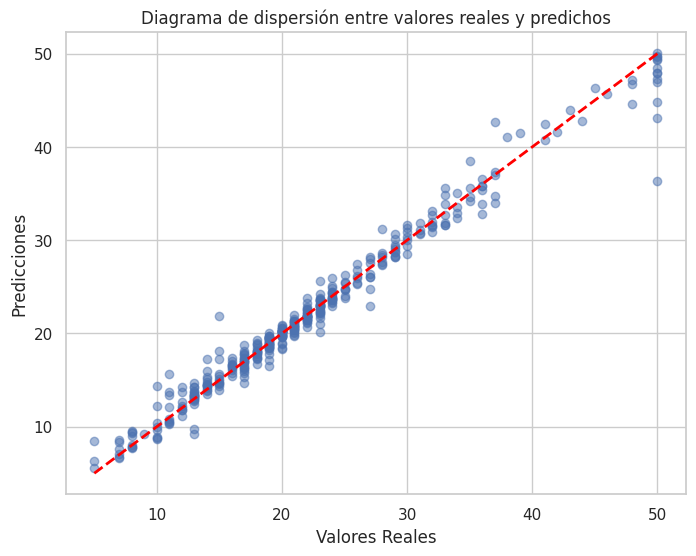

In [ ]:
import matplotlib.pyplot as plt

# Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, y_pred, alpha=0.5)
plt.title('Diagrama de dispersión entre valores reales y predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Añadir la línea 1 a 1
min_val = min(Y_train.min(), y_pred.min())
max_val = max(Y_train.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.show()